# FBT Scan Latency Analysis

This notebook analyzes the relationship between record size and average scan latency from the FBT scan latency benchmark results.

In [1]:
import matplotlib.pyplot as plt
import re
import glob
import os
import numpy as np

/home/rotaki/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def parse_latency_files():
    """Parse all fbt_scan_latency_*.txt files and extract record size, average latency, and leaf page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('fbt_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'fbt_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and leaf page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line - handle both ms and s units
            latency_match_ms = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            latency_match_s = re.search(r'Avg Latency: ([0-9.]+)s', content)
            
            # Find the leaf page count (Level 0 pages)
            leaf_page_match = re.search(r'----------------- Level 0 -----------------\nPage Created: (\d+)', content)
            
            avg_latency = None
            if latency_match_ms:
                avg_latency = float(latency_match_ms.group(1))  # Already in ms
            elif latency_match_s:
                avg_latency = float(latency_match_s.group(1)) * 1000  # Convert seconds to ms
            
            if avg_latency is not None and leaf_page_match:
                leaf_pages = int(leaf_page_match.group(1))
                data.append((record_size, avg_latency, leaf_pages))
                unit = "ms" if latency_match_ms else "s (converted to ms)"
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Leaf pages: {leaf_pages} (original unit: {unit})")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [3]:
# Parse the data
data = parse_latency_files()

if not data:
    print("No data found! Make sure the fbt_scan_latency_*.txt files are in the current directory.")
else:
    record_sizes, avg_latencies, leaf_pages = zip(*data)
    print(f"\nFound {len(data)} data points")
    print(f"Record sizes: {record_sizes}")
    print(f"Average latencies: {avg_latencies}")
    print(f"Leaf pages: {leaf_pages}")

Record size: 200, Avg latency: 127.144715ms, Leaf pages: 27083 (original unit: ms)
Record size: 4000, Avg latency: 1700.3273940000001ms, Leaf pages: 499433 (original unit: s (converted to ms))
Record size: 500, Avg latency: 310.763389ms, Leaf pages: 62451 (original unit: ms)
Record size: 100, Avg latency: 89.899276ms, Leaf pages: 15229 (original unit: ms)
Record size: 3000, Avg latency: 1403.485854ms, Leaf pages: 333073 (original unit: s (converted to ms))
Record size: 50, Avg latency: 63.077318ms, Leaf pages: 8985 (original unit: ms)
Record size: 2000, Avg latency: 1031.996712ms, Leaf pages: 249598 (original unit: s (converted to ms))
Record size: 1000, Avg latency: 562.325888ms, Leaf pages: 124870 (original unit: ms)

Found 8 data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (63.077318, 89.899276, 127.144715, 310.763389, 562.325888, 1031.996712, 1403.485854, 1700.3273940000001)
Leaf pages: (8985, 15229, 27083, 62451, 124870, 249598, 333073, 4994

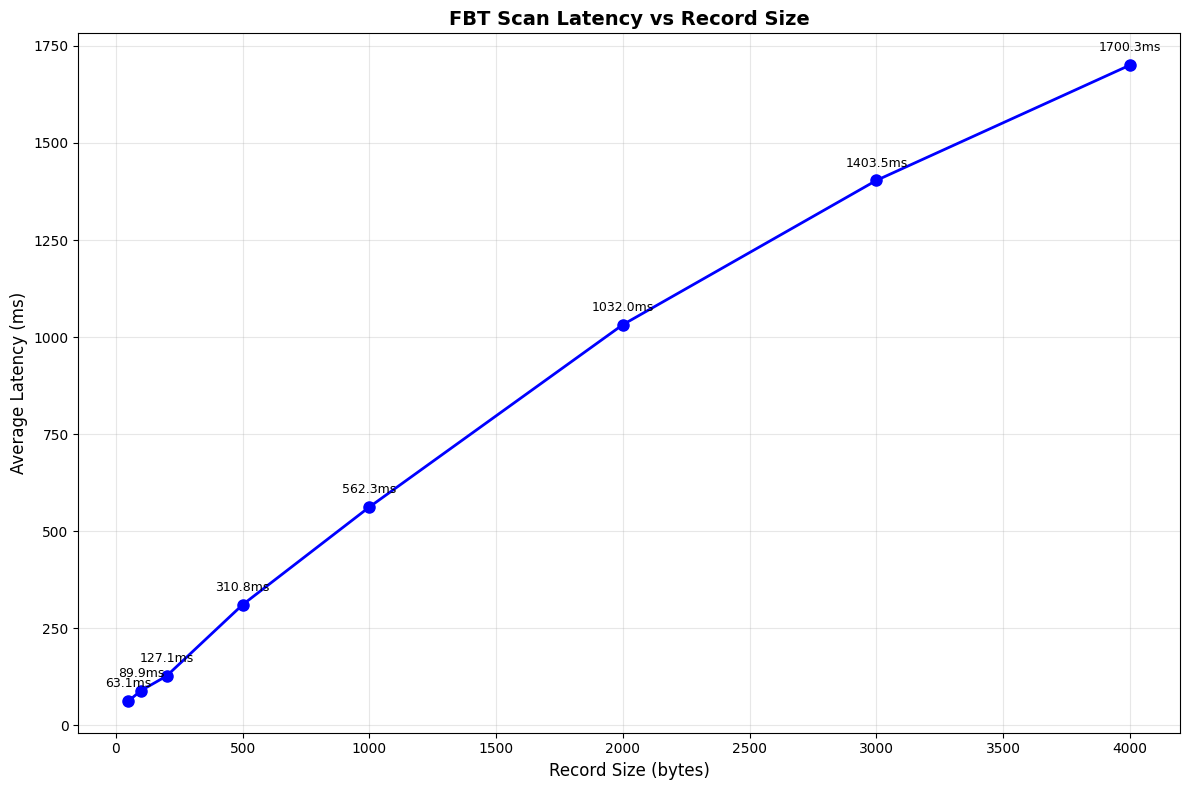

In [4]:
# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FBT Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

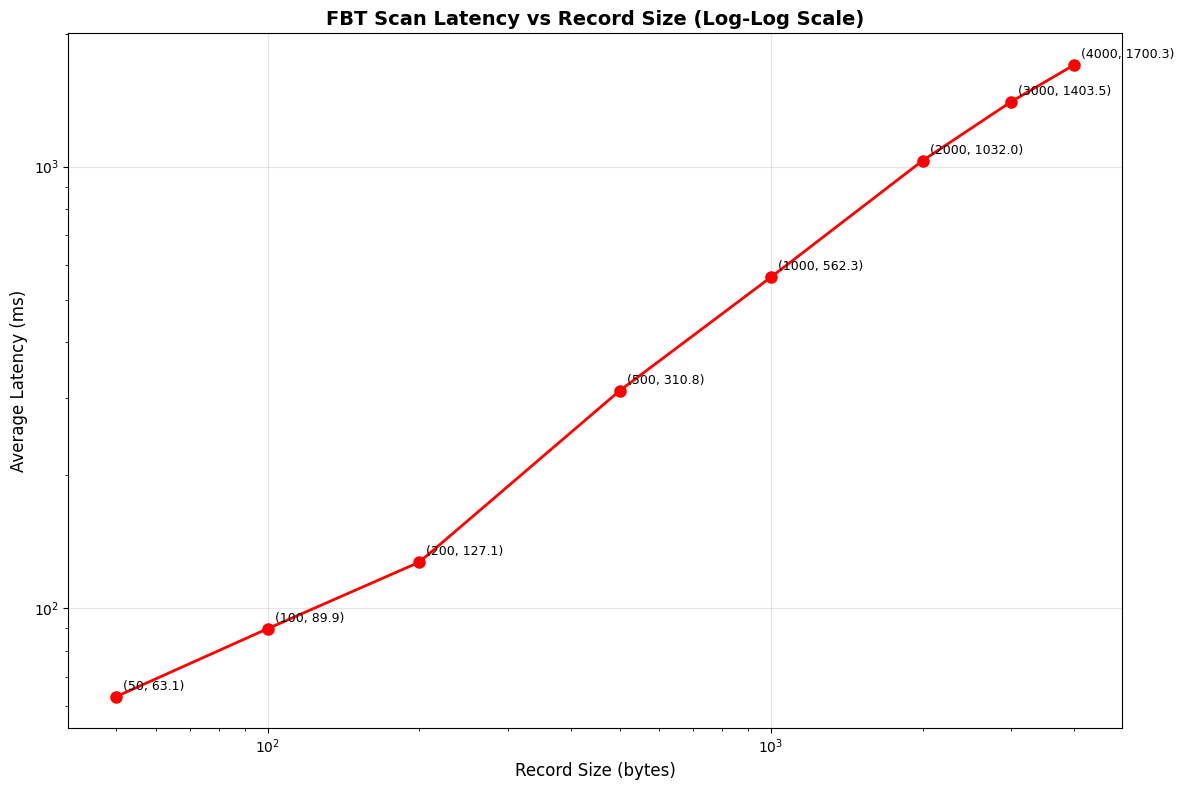

In [5]:
# Create a log-scale version for better visualization if there's a wide range
plt.figure(figsize=(12, 8))
plt.loglog(record_sizes, avg_latencies, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FBT Scan Latency vs Record Size (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

plt.tight_layout()
plt.show()

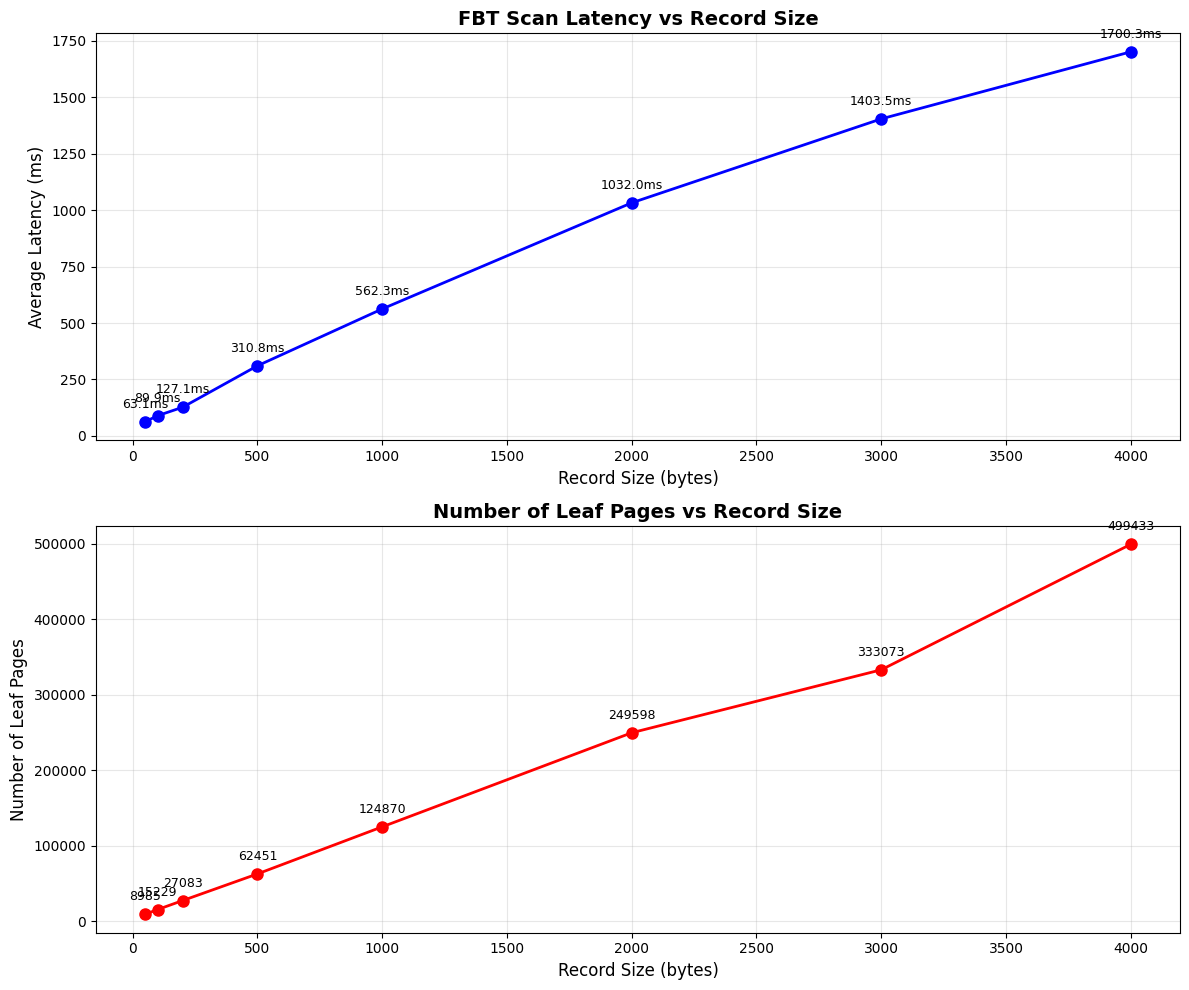

In [6]:
# Create a subplot showing both latency and leaf page count
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Latency vs Record Size
ax1.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Record Size (bytes)', fontsize=12)
ax1.set_ylabel('Average Latency (ms)', fontsize=12)
ax1.set_title('FBT Scan Latency vs Record Size', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(record_sizes, avg_latencies):
    ax1.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Plot 2: Leaf Pages vs Record Size
ax2.plot(record_sizes, leaf_pages, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Record Size (bytes)', fontsize=12)
ax2.set_ylabel('Number of Leaf Pages', fontsize=12)
ax2.set_title('Number of Leaf Pages vs Record Size', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lp in zip(record_sizes, leaf_pages):
    ax2.annotate(f'{lp}', (rs, lp), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

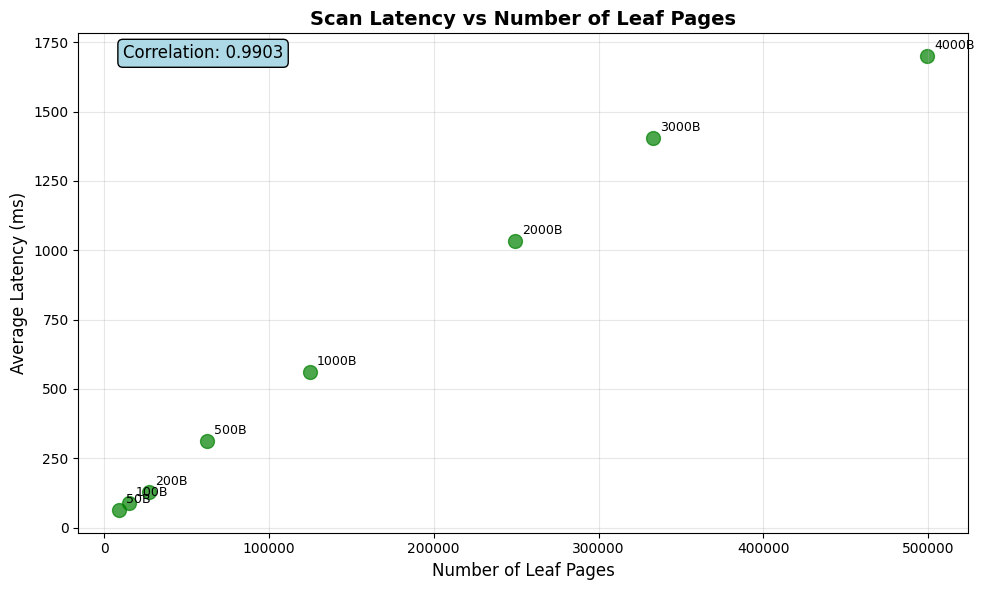

In [7]:
# Plot correlation between leaf pages and latency
plt.figure(figsize=(10, 6))
plt.scatter(leaf_pages, avg_latencies, c='green', s=100, alpha=0.7)
plt.xlabel('Number of Leaf Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency vs Number of Leaf Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, lp, lat in zip(record_sizes, leaf_pages, avg_latencies):
    plt.annotate(f'{rs}B', (lp, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(leaf_pages) > 1:
    correlation = np.corrcoef(leaf_pages, avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()

In [8]:
# Print summary statistics
if data:
    print("Summary Statistics:")
    print(f"Record size range: {min(record_sizes)} - {max(record_sizes)} bytes")
    print(f"Latency range: {min(avg_latencies):.2f} - {max(avg_latencies):.2f} ms")
    print(f"Leaf pages range: {min(leaf_pages)} - {max(leaf_pages)} pages")
    print(f"Average latency: {np.mean(avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(avg_latencies):.2f} ms")
    print(f"Average leaf pages: {np.mean(leaf_pages):.0f} pages")
    print(f"Median leaf pages: {np.median(leaf_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(data) > 1:
        latency_recordsize_corr = np.corrcoef(record_sizes, avg_latencies)[0, 1]
        leafpages_recordsize_corr = np.corrcoef(record_sizes, leaf_pages)[0, 1]
        latency_leafpages_corr = np.corrcoef(leaf_pages, avg_latencies)[0, 1]
        
        print(f"\nCorrelations:")
        print(f"Latency vs Record Size: {latency_recordsize_corr:.4f}")
        print(f"Leaf Pages vs Record Size: {leafpages_recordsize_corr:.4f}")
        print(f"Latency vs Leaf Pages: {latency_leafpages_corr:.4f}")

Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 63.08 - 1700.33 ms
Leaf pages range: 8985 - 499433 pages
Average latency: 661.13 ms
Median latency: 436.54 ms
Average leaf pages: 165090 pages
Median leaf pages: 93660 pages

Correlations:
Latency vs Record Size: 0.9954
Leaf Pages vs Record Size: 0.9973
Latency vs Leaf Pages: 0.9903


# HS (Heap Store) Scan Latency Analysis

This section analyzes the scan latency performance of the Heap Store access method.

In [9]:
def parse_hs_latency_files():
    """Parse all hs_scan_latency_*.txt files and extract record size, average latency, and page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('hs_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'hs_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line - handle both ms and s units
            latency_match_ms = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            latency_match_s = re.search(r'Avg Latency: ([0-9.]+)s', content)
            
            # Find the page count 
            page_match = re.search(r'Page Created: (\d+)', content)
            
            avg_latency = None
            if latency_match_ms:
                avg_latency = float(latency_match_ms.group(1))  # Already in ms
            elif latency_match_s:
                avg_latency = float(latency_match_s.group(1)) * 1000  # Convert seconds to ms
            
            if avg_latency is not None and page_match:
                pages = int(page_match.group(1))
                data.append((record_size, avg_latency, pages))
                unit = "ms" if latency_match_ms else "s (converted to ms)"
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Pages: {pages} (original unit: {unit})")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [10]:
# Parse the HS data
hs_data = parse_hs_latency_files()

if not hs_data:
    print("No HS data found! Make sure the hs_scan_latency_*.txt files are in the current directory.")
else:
    hs_record_sizes, hs_avg_latencies, hs_pages = zip(*hs_data)
    print(f"\nFound {len(hs_data)} HS data points")
    print(f"Record sizes: {hs_record_sizes}")
    print(f"Average latencies: {hs_avg_latencies}")
    print(f"Pages: {hs_pages}")

Record size: 500, Avg latency: 99.56389ms, Pages: 32260 (original unit: ms)
Record size: 2000, Avg latency: 500.986214ms, Pages: 125001 (original unit: ms)
Record size: 50, Avg latency: 41.676277ms, Pages: 4407 (original unit: ms)
Record size: 3000, Avg latency: 672.456033ms, Pages: 200001 (original unit: ms)
Record size: 1000, Avg latency: 240.522666ms, Pages: 62501 (original unit: ms)
Record size: 200, Avg latency: 60.170107ms, Pages: 13700 (original unit: ms)
Record size: 100, Avg latency: 54.37664ms, Pages: 7464 (original unit: ms)
Record size: 4000, Avg latency: 691.150496ms, Pages: 250001 (original unit: ms)

Found 8 HS data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (41.676277, 54.37664, 60.170107, 99.56389, 240.522666, 500.986214, 672.456033, 691.150496)
Pages: (4407, 7464, 13700, 32260, 62501, 125001, 200001, 250001)


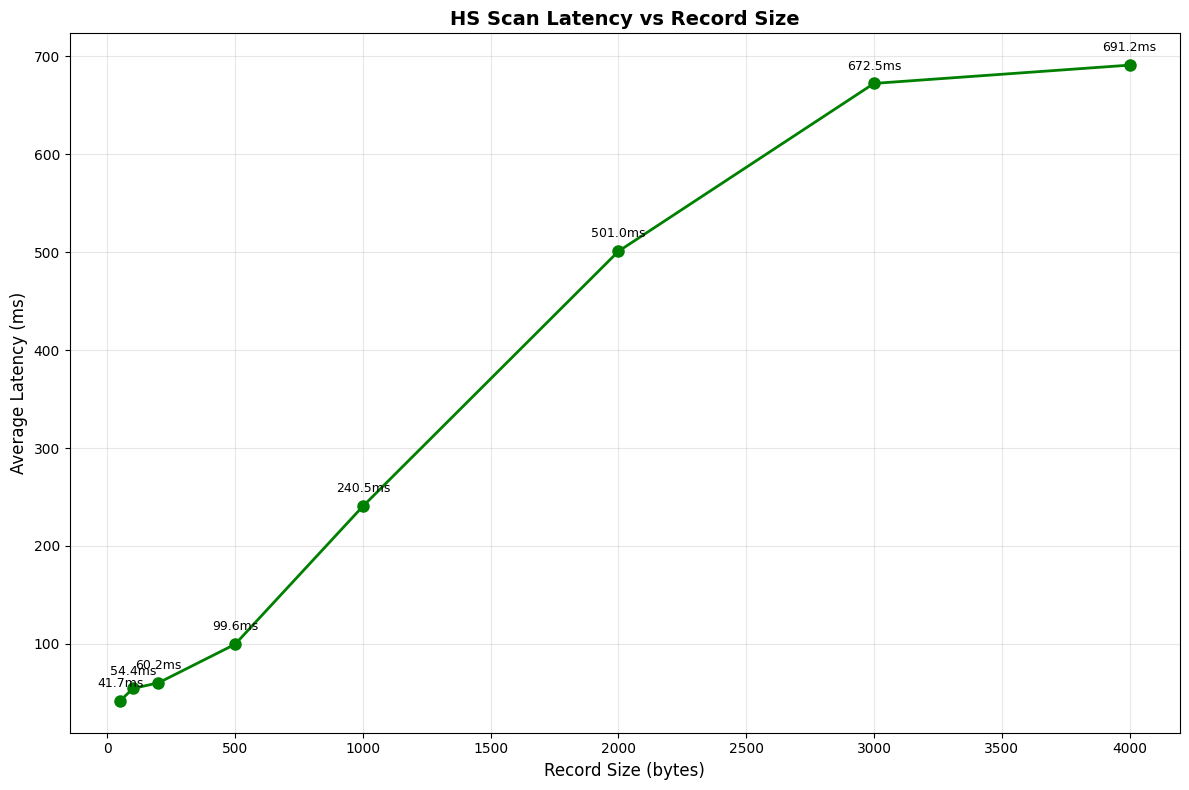

In [11]:
# Create HS scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(hs_record_sizes, hs_avg_latencies, 'go-', linewidth=2, markersize=8, label='HS')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('HS Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

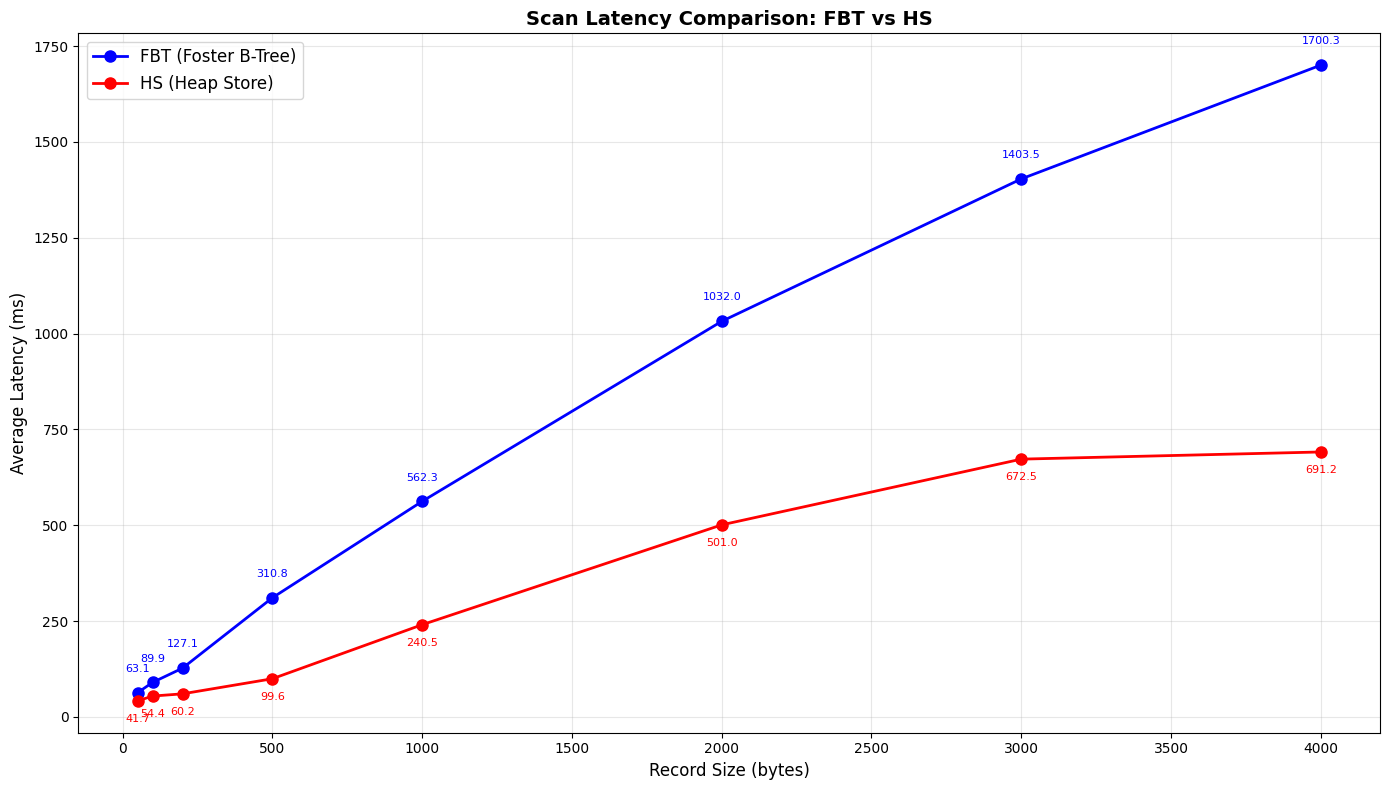

In [12]:
# Compare FBT vs HS scan latency
plt.figure(figsize=(14, 8))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

# Add value labels on HS points
for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

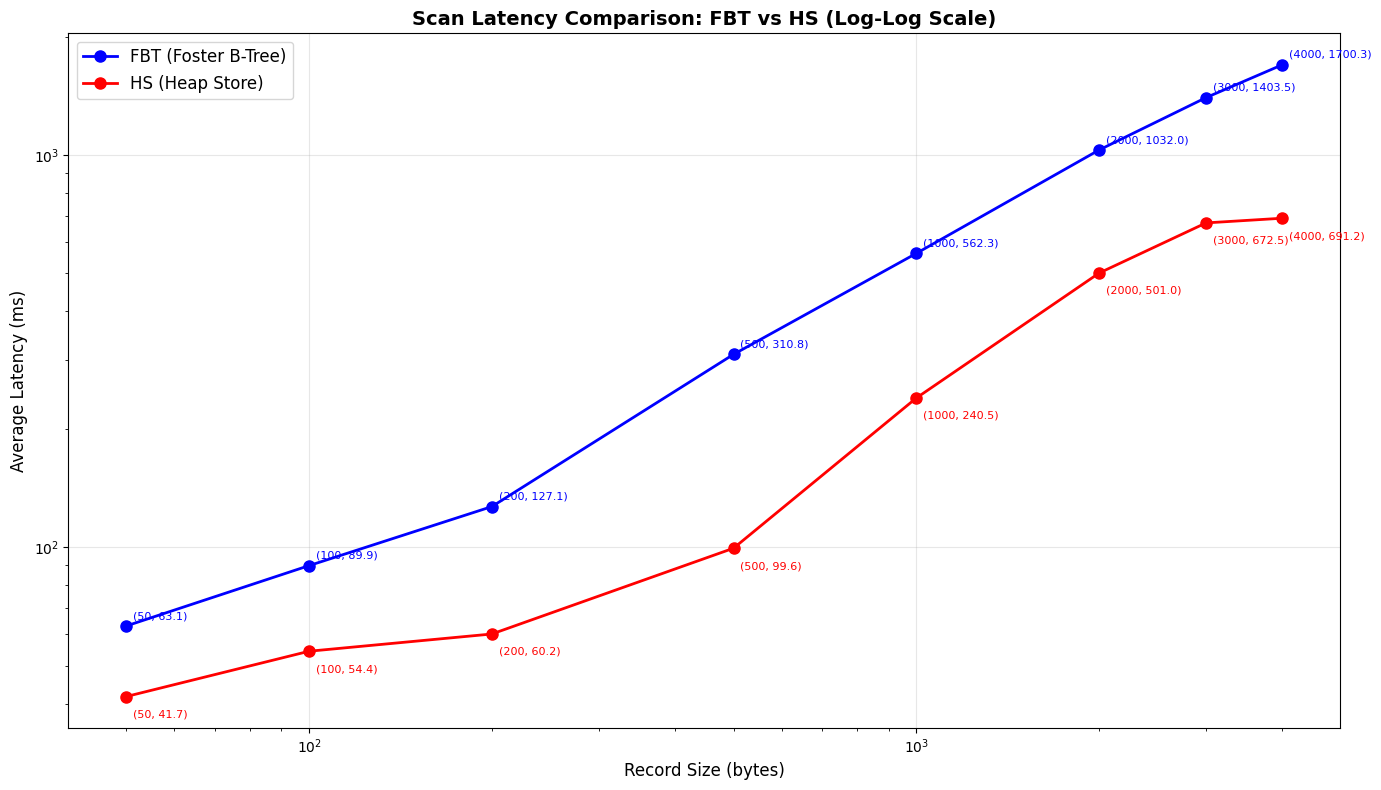

In [13]:
# Log-scale comparison
plt.figure(figsize=(14, 8))
plt.loglog(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.loglog(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=8, color='blue')

# Add value labels on HS points
for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=8, color='red')

plt.tight_layout()
plt.show()

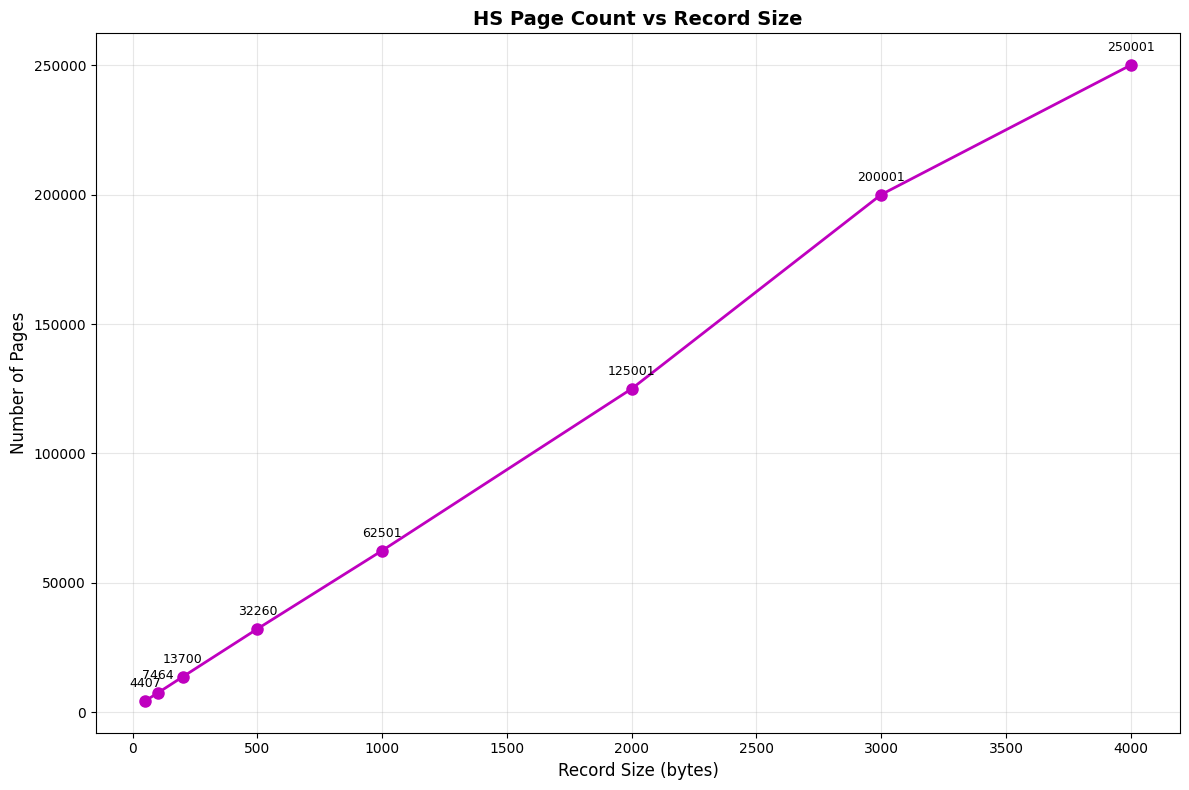

In [14]:
# HS page count analysis
plt.figure(figsize=(12, 8))
plt.plot(hs_record_sizes, hs_pages, 'mo-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('HS Page Count vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

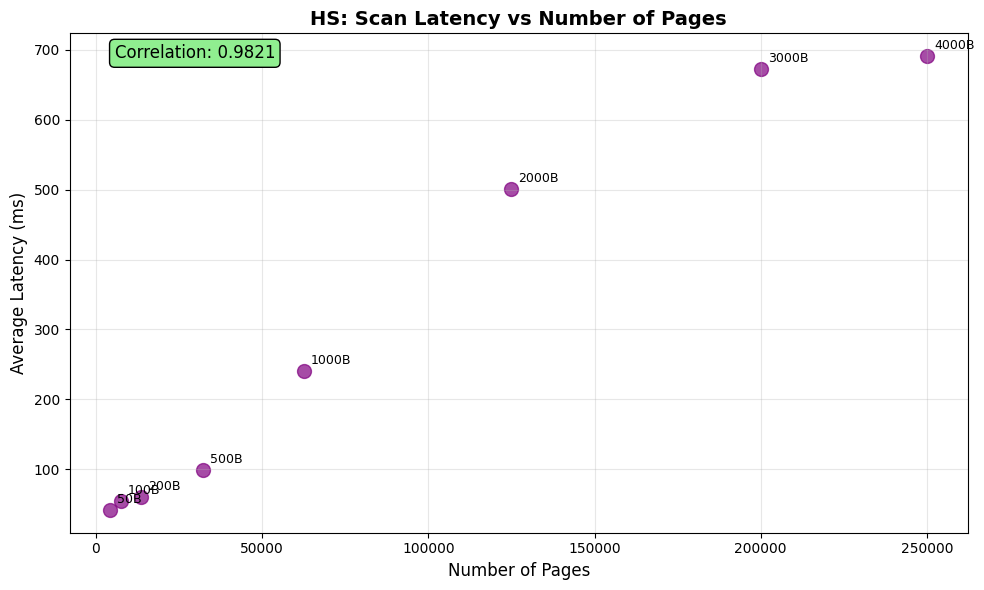

In [15]:
# HS correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(hs_pages, hs_avg_latencies, c='purple', s=100, alpha=0.7)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('HS: Scan Latency vs Number of Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, pages, lat in zip(hs_record_sizes, hs_pages, hs_avg_latencies):
    plt.annotate(f'{rs}B', (pages, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(hs_pages) > 1:
    hs_correlation = np.corrcoef(hs_pages, hs_avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {hs_correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

In [16]:
# HS summary statistics and comparison
if hs_data:
    print("HS Summary Statistics:")
    print(f"Record size range: {min(hs_record_sizes)} - {max(hs_record_sizes)} bytes")
    print(f"Latency range: {min(hs_avg_latencies):.2f} - {max(hs_avg_latencies):.2f} ms")
    print(f"Pages range: {min(hs_pages)} - {max(hs_pages)} pages")
    print(f"Average latency: {np.mean(hs_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(hs_avg_latencies):.2f} ms")
    print(f"Average pages: {np.mean(hs_pages):.0f} pages")
    print(f"Median pages: {np.median(hs_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(hs_data) > 1:
        hs_latency_recordsize_corr = np.corrcoef(hs_record_sizes, hs_avg_latencies)[0, 1]
        hs_pages_recordsize_corr = np.corrcoef(hs_record_sizes, hs_pages)[0, 1]
        hs_latency_pages_corr = np.corrcoef(hs_pages, hs_avg_latencies)[0, 1]
        
        print(f"\nHS Correlations:")
        print(f"Latency vs Record Size: {hs_latency_recordsize_corr:.4f}")
        print(f"Pages vs Record Size: {hs_pages_recordsize_corr:.4f}")
        print(f"Latency vs Pages: {hs_latency_pages_corr:.4f}")

# Performance comparison table
if data and hs_data:
    print("\n" + "="*80)
    print("PERFORMANCE COMPARISON: FBT vs HS")
    print("="*80)
    print(f"{'Record Size':<12} {'FBT Latency':<15} {'HS Latency':<15} {'Speedup':<10} {'FBT Pages':<12} {'HS Pages':<12}")
    print("-" * 80)
    
    # Find common record sizes
    common_sizes = set(record_sizes) & set(hs_record_sizes)
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        speedup = fbt_latency / hs_latency
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        
        print(f"{size:<12} {fbt_latency:<15.2f} {hs_latency:<15.2f} {speedup:<10.2f}x {fbt_pages_count:<12} {hs_pages_count:<12}")
    
    print("-" * 80)
    avg_speedup = np.mean([avg_latencies[record_sizes.index(size)] / hs_avg_latencies[hs_record_sizes.index(size)] 
                          for size in common_sizes])
    print(f"Average speedup: {avg_speedup:.2f}x (FBT is {avg_speedup:.2f}x slower than HS)")

HS Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 41.68 - 691.15 ms
Pages range: 4407 - 250001 pages
Average latency: 295.11 ms
Median latency: 170.04 ms
Average pages: 86917 pages
Median pages: 47380 pages

HS Correlations:
Latency vs Record Size: 0.9786
Pages vs Record Size: 0.9991
Latency vs Pages: 0.9821

PERFORMANCE COMPARISON: FBT vs HS
Record Size  FBT Latency     HS Latency      Speedup    FBT Pages    HS Pages    
--------------------------------------------------------------------------------
50           63.08           41.68           1.51      x 8985         4407        
100          89.90           54.38           1.65      x 15229        7464        
200          127.14          60.17           2.11      x 27083        13700       
500          310.76          99.56           3.12      x 62451        32260       
1000         562.33          240.52          2.34      x 124870       62501       
2000         1032.00         500.99          2.06     

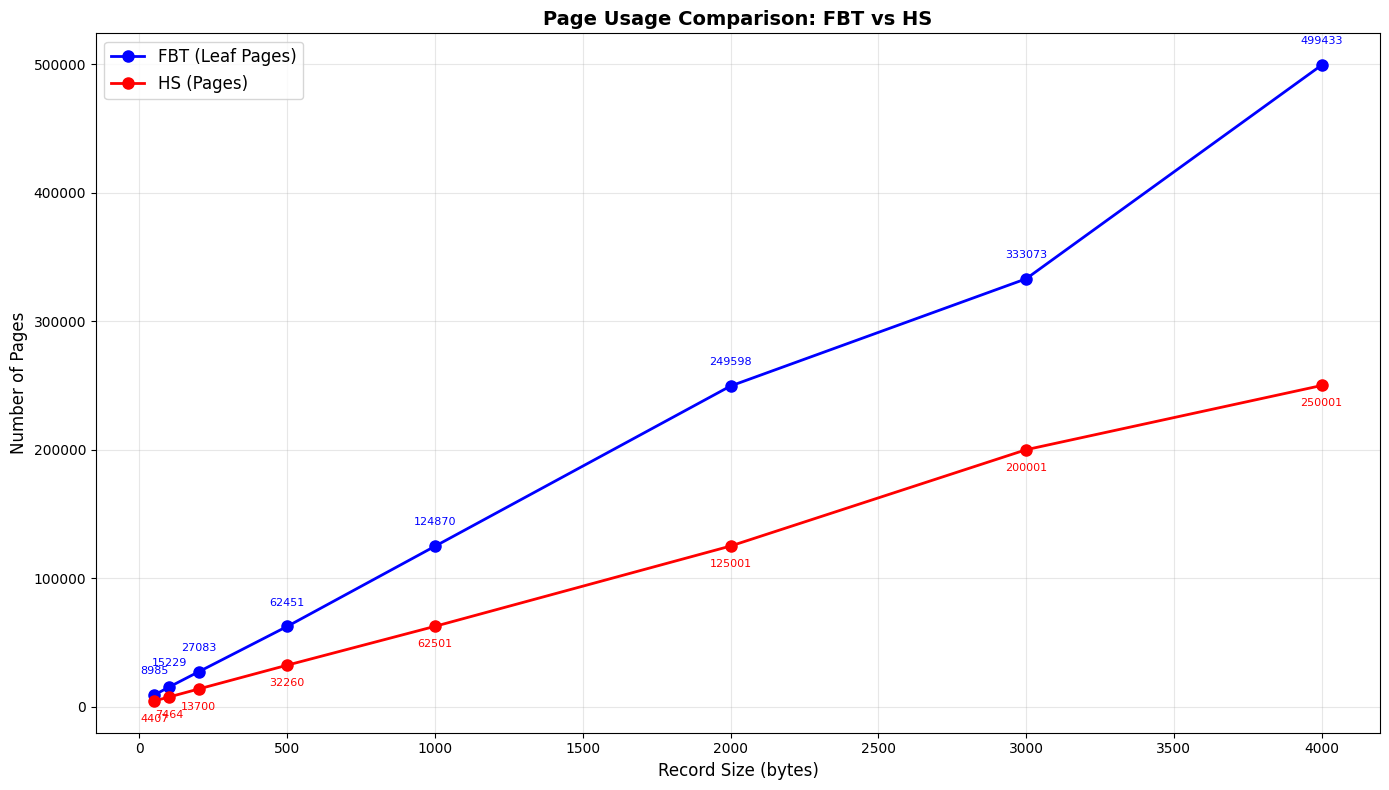

In [17]:
# Compare page usage: FBT (leaf pages) vs HS
plt.figure(figsize=(14, 8))
plt.plot(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.plot(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, pages in zip(record_sizes, leaf_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

# Add value labels on HS points
for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

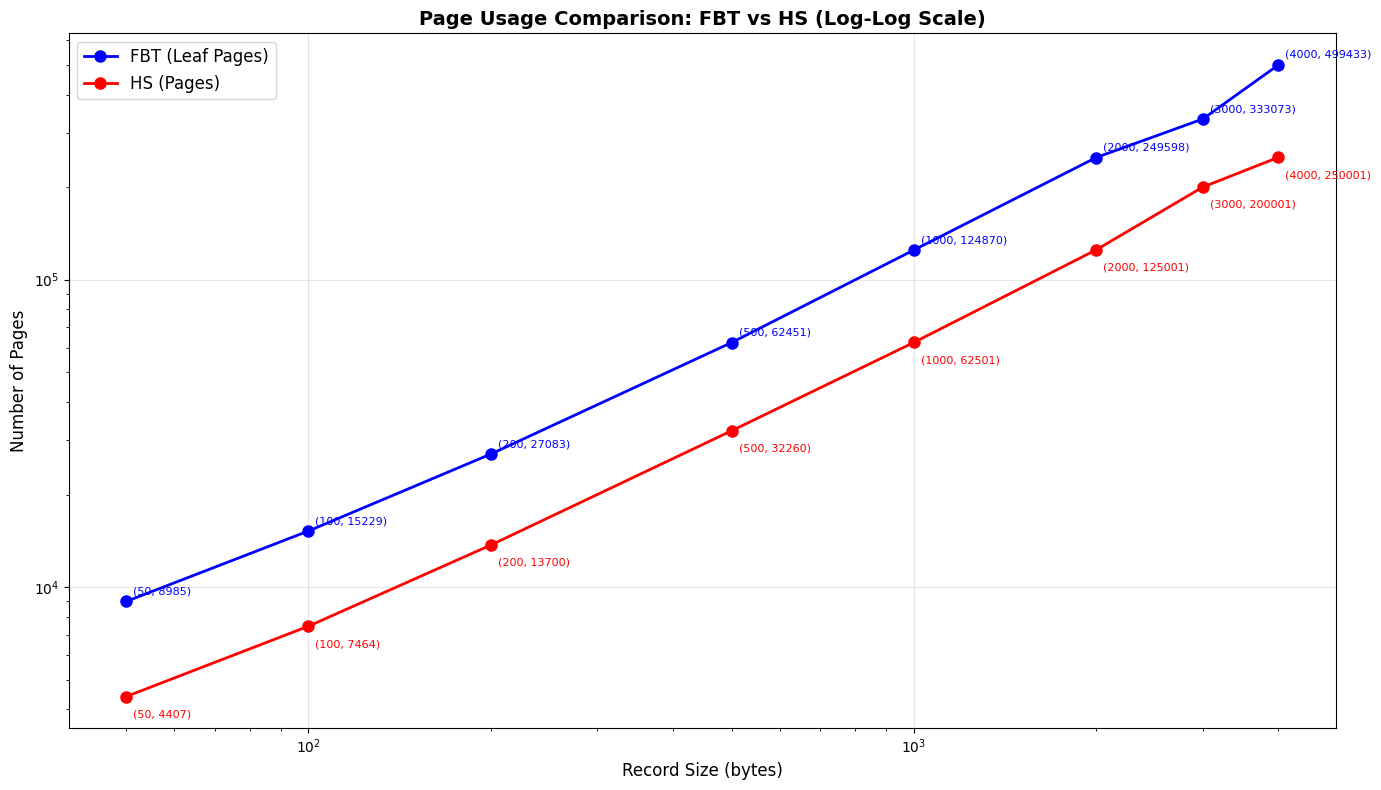

In [18]:
# Log-scale page usage comparison
plt.figure(figsize=(14, 8))
plt.loglog(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.loglog(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, pages in zip(record_sizes, leaf_pages):
    plt.annotate(f'({rs}, {pages})', (rs, pages), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=8, color='blue')

# Add value labels on HS points
for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'({rs}, {pages})', (rs, pages), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [19]:
# Page usage efficiency analysis
if data and hs_data:
    print("PAGE USAGE ANALYSIS")
    print("="*60)
    print(f"{'Record Size':<12} {'FBT Pages':<12} {'HS Pages':<12} {'Page Ratio':<15} {'Space Efficiency'}")
    print("-" * 60)
    
    # Find common record sizes and calculate page usage efficiency
    common_sizes = set(record_sizes) & set(hs_record_sizes)
    page_ratios = []
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        page_ratio = fbt_pages_count / hs_pages_count
        page_ratios.append(page_ratio)
        
        # Calculate space efficiency (lower is better - fewer pages needed)
        efficiency = "HS better" if hs_pages_count < fbt_pages_count else "FBT better"
        
        print(f"{size:<12} {fbt_pages_count:<12} {hs_pages_count:<12} {page_ratio:<15.2f} {efficiency}")
    
    print("-" * 60)
    avg_page_ratio = np.mean(page_ratios)
    print(f"Average page ratio (FBT/HS): {avg_page_ratio:.2f}")
    if avg_page_ratio > 1:
        print(f"FBT uses {avg_page_ratio:.2f}x more pages than HS on average")
    else:
        print(f"HS uses {1/avg_page_ratio:.2f}x more pages than FBT on average")
    
    # Calculate total data stored (assuming 1M records)
    print(f"\nDATA STORAGE ANALYSIS (for 1M records):")
    print("-" * 40)
    for size in sorted(common_sizes):
        total_data_mb = (1000000 * size) / (1024 * 1024)
        print(f"Record size {size}B: {total_data_mb:.1f} MB total data")

PAGE USAGE ANALYSIS
Record Size  FBT Pages    HS Pages     Page Ratio      Space Efficiency
------------------------------------------------------------
50           8985         4407         2.04            HS better
100          15229        7464         2.04            HS better
200          27083        13700        1.98            HS better
500          62451        32260        1.94            HS better
1000         124870       62501        2.00            HS better
2000         249598       125001       2.00            HS better
3000         333073       200001       1.67            HS better
4000         499433       250001       2.00            HS better
------------------------------------------------------------
Average page ratio (FBT/HS): 1.96
FBT uses 1.96x more pages than HS on average

DATA STORAGE ANALYSIS (for 1M records):
----------------------------------------
Record size 50B: 47.7 MB total data
Record size 100B: 95.4 MB total data
Record size 200B: 190.7 MB total

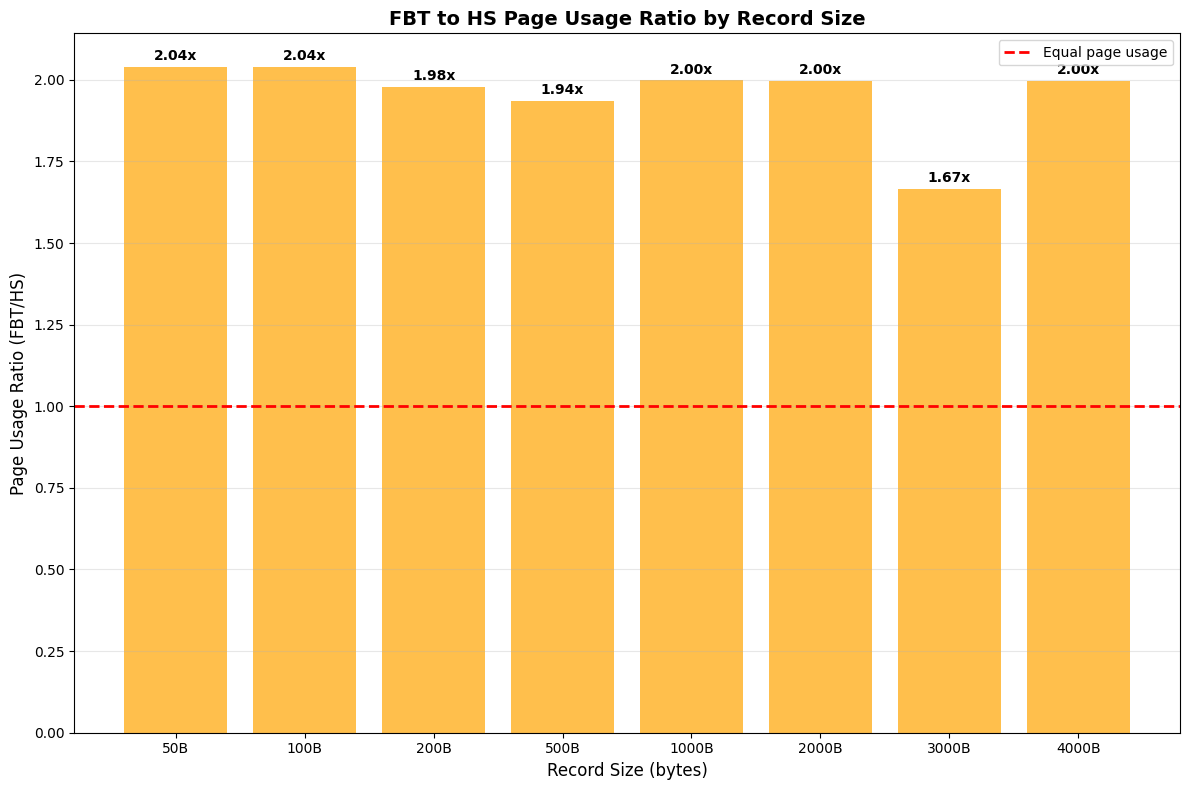


Page Usage Summary:
- Average FBT/HS page ratio: 1.96x
- FBT consistently uses more pages than HS for the same data
- This is expected due to B-tree structure overhead vs. sequential storage


In [20]:
# Page usage ratio visualization
if data and hs_data:
    common_sizes = sorted(set(record_sizes) & set(hs_record_sizes))
    page_ratios = []
    
    for size in common_sizes:
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        page_ratio = fbt_pages_count / hs_pages_count
        page_ratios.append(page_ratio)
    
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(common_sizes)), page_ratios, color='orange', alpha=0.7)
    plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Equal page usage')
    plt.xlabel('Record Size (bytes)', fontsize=12)
    plt.ylabel('Page Usage Ratio (FBT/HS)', fontsize=12)
    plt.title('FBT to HS Page Usage Ratio by Record Size', fontsize=14, fontweight='bold')
    plt.xticks(range(len(common_sizes)), [f'{size}B' for size in common_sizes])
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (size, ratio) in enumerate(zip(common_sizes, page_ratios)):
        plt.annotate(f'{ratio:.2f}x', (i, ratio), textcoords="offset points", 
                    xytext=(0,5), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Summary text
    avg_ratio = np.mean(page_ratios)
    print(f"\nPage Usage Summary:")
    print(f"- Average FBT/HS page ratio: {avg_ratio:.2f}x")
    print(f"- FBT consistently uses more pages than HS for the same data")
    print(f"- This is expected due to B-tree structure overhead vs. sequential storage")

# APS (Append Only Store) Scan Latency Analysis

This section analyzes the scan latency performance of the Append Only Store access method.

In [21]:
def parse_aps_latency_files():
    """Parse all aps_scan_latency_*.txt files and extract record size, average latency, and page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('aps_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'aps_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line - handle both ms and s units
            latency_match_ms = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            latency_match_s = re.search(r'Avg Latency: ([0-9.]+)s', content)
            
            # Find the page count 
            page_match = re.search(r'Page Created: (\d+)', content)
            
            avg_latency = None
            if latency_match_ms:
                avg_latency = float(latency_match_ms.group(1))  # Already in ms
            elif latency_match_s:
                avg_latency = float(latency_match_s.group(1)) * 1000  # Convert seconds to ms
            
            if avg_latency is not None and page_match:
                pages = int(page_match.group(1))
                data.append((record_size, avg_latency, pages))
                unit = "ms" if latency_match_ms else "s (converted to ms)"
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Pages: {pages} (original unit: {unit})")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [22]:
# Parse the APS data
aps_data = parse_aps_latency_files()

if not aps_data:
    print("No APS data found! Make sure the aps_scan_latency_*.txt files are in the current directory.")
else:
    aps_record_sizes, aps_avg_latencies, aps_pages = zip(*aps_data)
    print(f"\nFound {len(aps_data)} APS data points")
    print(f"Record sizes: {aps_record_sizes}")
    print(f"Average latencies: {aps_avg_latencies}")
    print(f"Pages: {aps_pages}")

Record size: 100, Avg latency: 56.253829ms, Pages: 7248 (original unit: ms)
Record size: 4000, Avg latency: 747.332358ms, Pages: 250001 (original unit: ms)
Record size: 500, Avg latency: 92.126001ms, Pages: 32260 (original unit: ms)
Record size: 1000, Avg latency: 196.230677ms, Pages: 62501 (original unit: ms)
Record size: 200, Avg latency: 52.91012ms, Pages: 13335 (original unit: ms)
Record size: 50, Avg latency: 43.331236ms, Pages: 4168 (original unit: ms)
Record size: 3000, Avg latency: 664.27439ms, Pages: 200001 (original unit: ms)
Record size: 2000, Avg latency: 415.695433ms, Pages: 125001 (original unit: ms)

Found 8 APS data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (43.331236, 56.253829, 52.91012, 92.126001, 196.230677, 415.695433, 664.27439, 747.332358)
Pages: (4168, 7248, 13335, 32260, 62501, 125001, 200001, 250001)


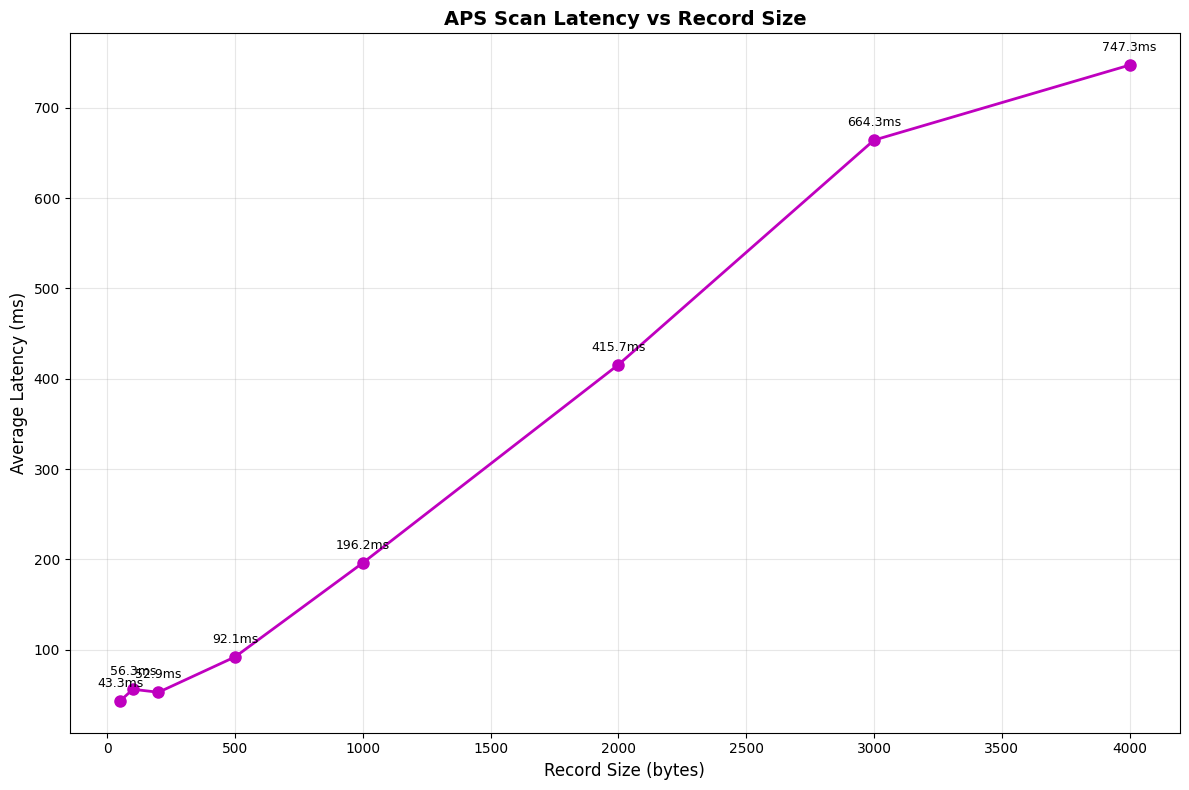

In [23]:
# Create APS scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(aps_record_sizes, aps_avg_latencies, 'mo-', linewidth=2, markersize=8, label='APS')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('APS Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(aps_record_sizes, aps_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

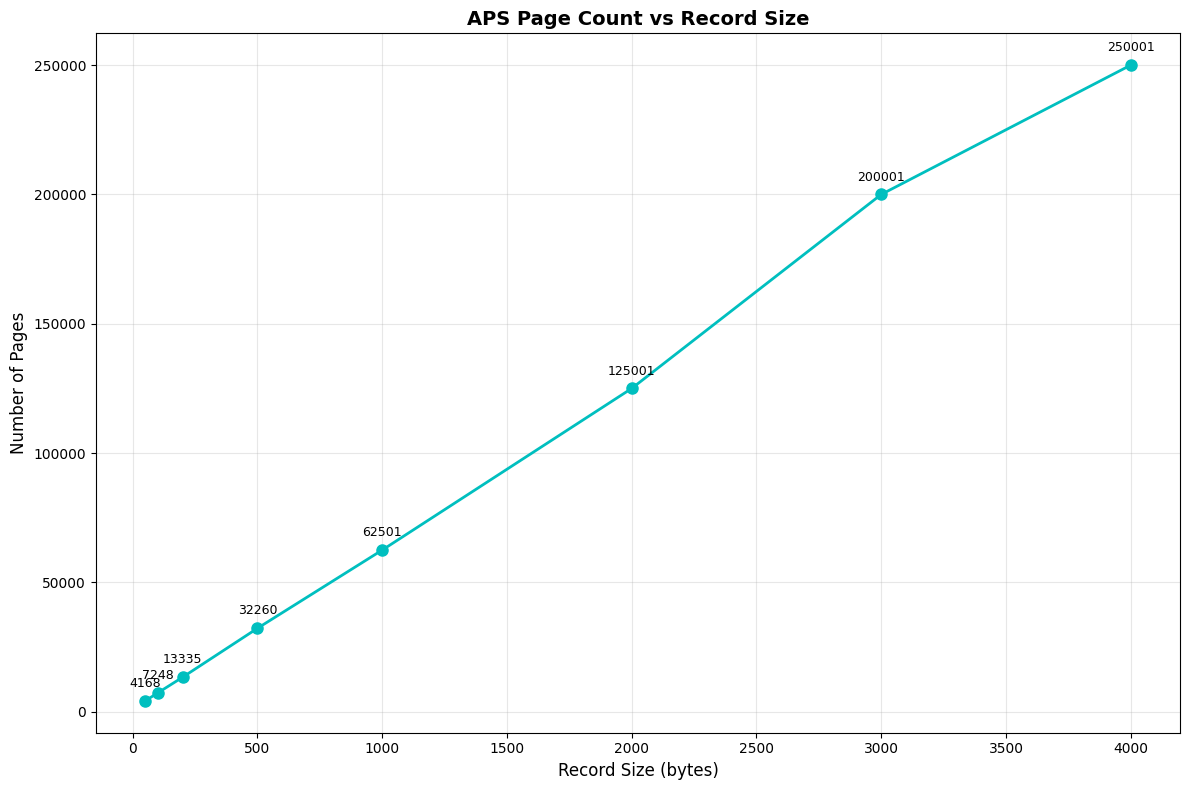

In [24]:
# APS page count analysis
plt.figure(figsize=(12, 8))
plt.plot(aps_record_sizes, aps_pages, 'co-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('APS Page Count vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, pages in zip(aps_record_sizes, aps_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

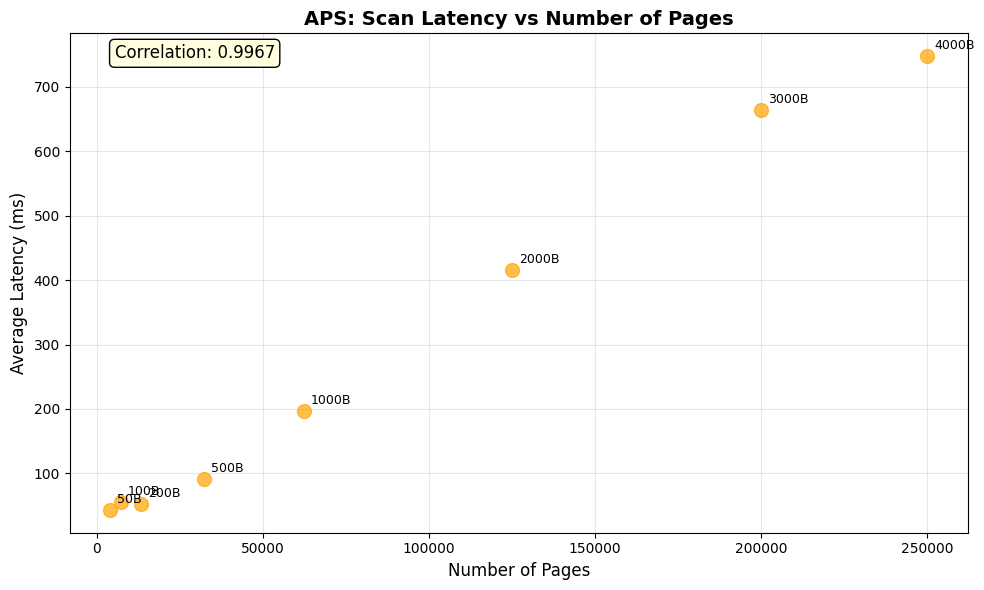

In [25]:
# APS correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(aps_pages, aps_avg_latencies, c='orange', s=100, alpha=0.7)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('APS: Scan Latency vs Number of Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, pages, lat in zip(aps_record_sizes, aps_pages, aps_avg_latencies):
    plt.annotate(f'{rs}B', (pages, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(aps_pages) > 1:
    aps_correlation = np.corrcoef(aps_pages, aps_avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {aps_correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))

plt.tight_layout()
plt.show()

# Three-Way Comparison: FBT vs HS vs APS

This section compares the scan latency performance across all three access methods.

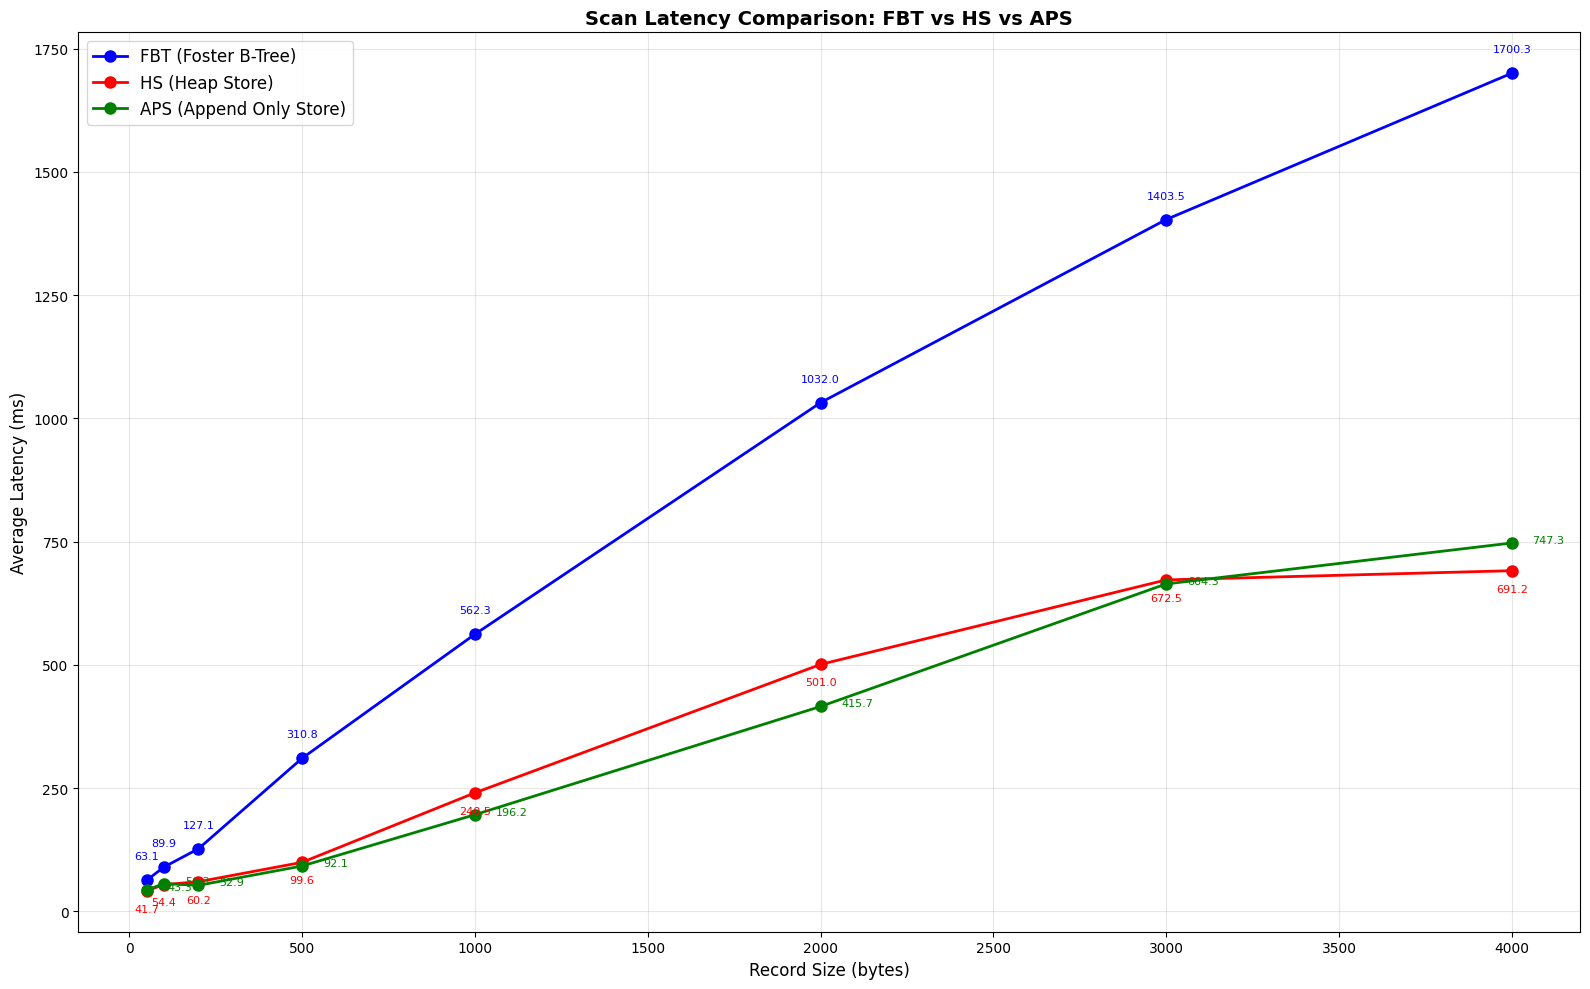

In [26]:
# Three-way scan latency comparison
plt.figure(figsize=(16, 10))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.plot(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS vs APS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

for rs, lat in zip(aps_record_sizes, aps_avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(15,0), ha='left', fontsize=8, color='green')

plt.tight_layout()
plt.show()

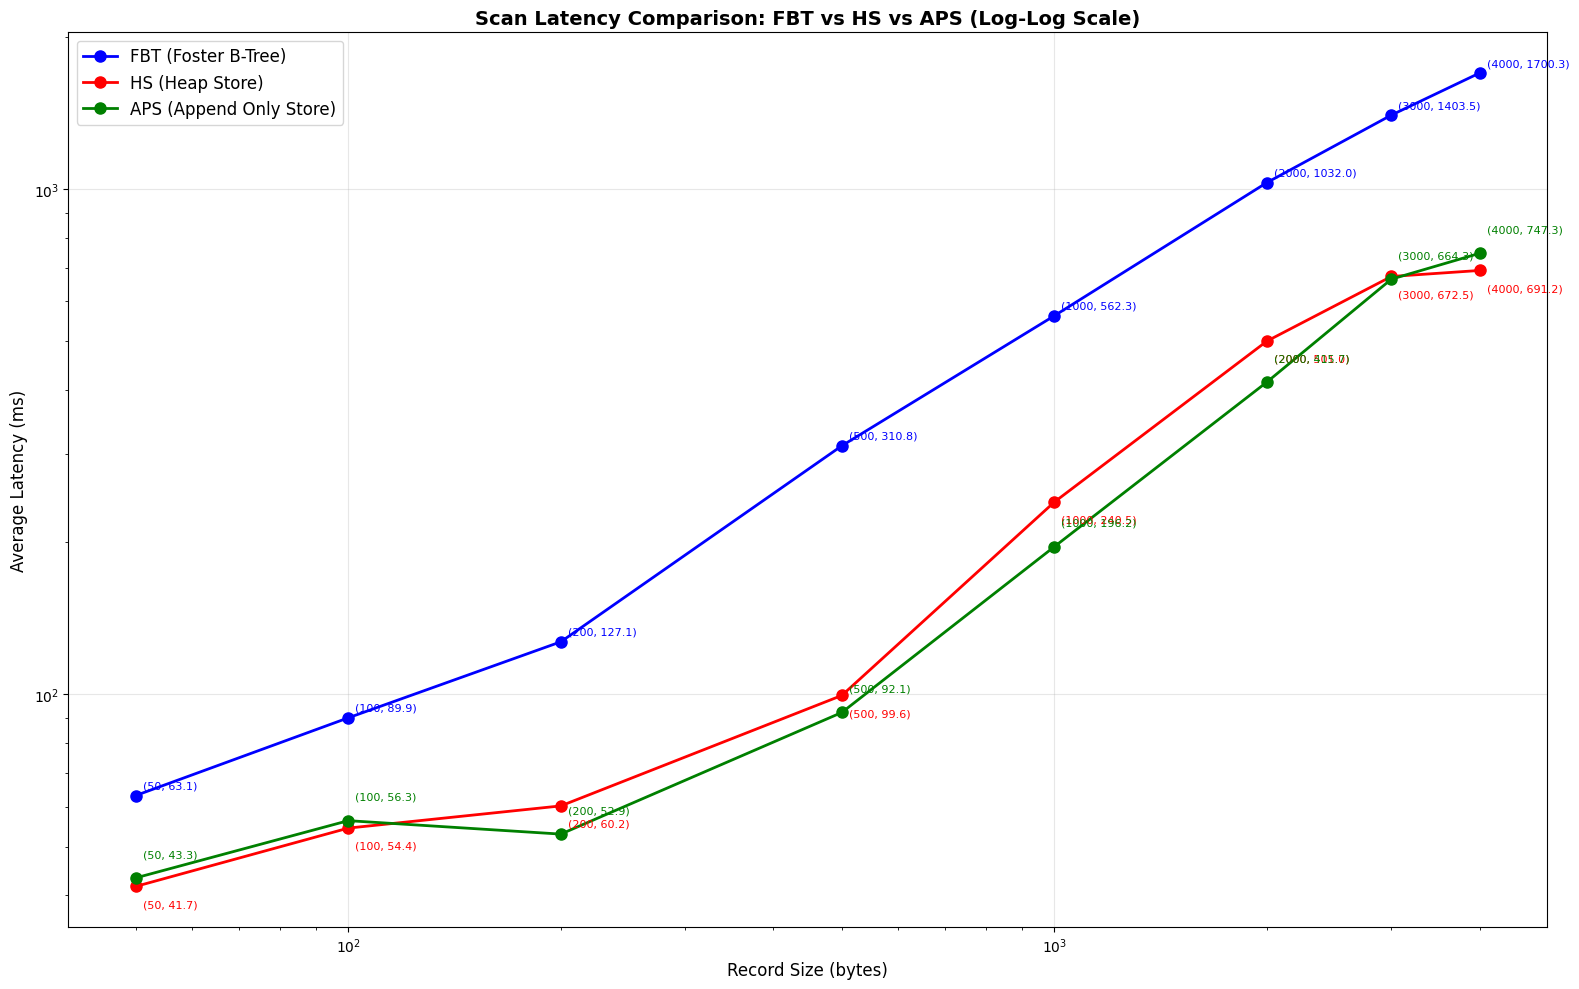

In [27]:
# Log-scale three-way comparison
plt.figure(figsize=(16, 10))
plt.loglog(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.loglog(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.loglog(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS vs APS (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=8, color='blue')

for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=8, color='red')

for rs, lat in zip(aps_record_sizes, aps_avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,15), ha='left', fontsize=8, color='green')

plt.tight_layout()
plt.show()

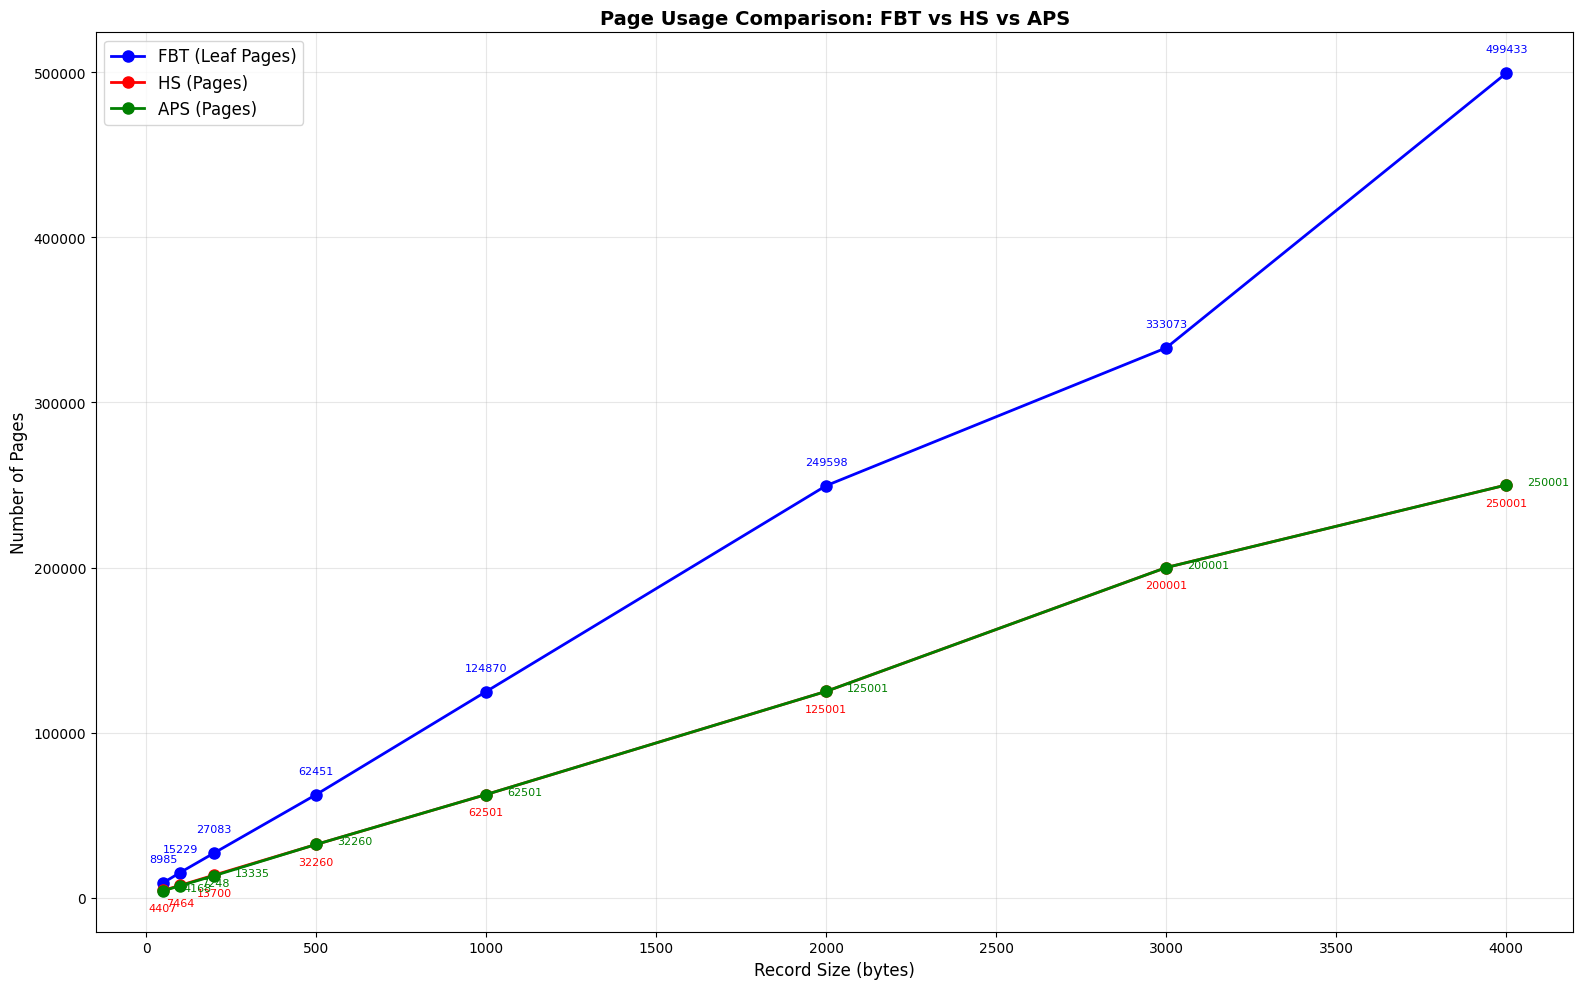

In [28]:
# Three-way page usage comparison
plt.figure(figsize=(16, 10))
plt.plot(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.plot(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.plot(aps_record_sizes, aps_pages, 'go-', linewidth=2, markersize=8, label='APS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS vs APS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for rs, pages in zip(record_sizes, leaf_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

for rs, pages in zip(aps_record_sizes, aps_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(15,0), ha='left', fontsize=8, color='green')

plt.tight_layout()
plt.show()

In [29]:
# Comprehensive performance comparison table
if data and hs_data and aps_data:
    print("COMPREHENSIVE PERFORMANCE COMPARISON")
    print("="*100)
    print(f"{'Record Size':<12} {'FBT Latency':<15} {'HS Latency':<15} {'APS Latency':<15} {'Best':<8} {'FBT/HS':<10} {'FBT/APS':<10}")
    print("-" * 100)
    
    # Find common record sizes across all three
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes)
    
    fbt_hs_speedups = []
    fbt_aps_speedups = []
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        aps_latency = aps_avg_latencies[aps_idx]
        
        # Determine the best performer
        best_latency = min(fbt_latency, hs_latency, aps_latency)
        if best_latency == fbt_latency:
            best = "FBT"
        elif best_latency == hs_latency:
            best = "HS"
        else:
            best = "APS"
        
        fbt_hs_speedup = fbt_latency / hs_latency
        fbt_aps_speedup = fbt_latency / aps_latency
        
        fbt_hs_speedups.append(fbt_hs_speedup)
        fbt_aps_speedups.append(fbt_aps_speedup)
        
        print(f"{size:<12} {fbt_latency:<15.2f} {hs_latency:<15.2f} {aps_latency:<15.2f} {best:<8} {fbt_hs_speedup:<10.2f} {fbt_aps_speedup:<10.2f}")
    
    print("-" * 100)
    avg_fbt_hs_speedup = np.mean(fbt_hs_speedups)
    avg_fbt_aps_speedup = np.mean(fbt_aps_speedups)
    
    print(f"Average FBT/HS ratio: {avg_fbt_hs_speedup:.2f}x")
    print(f"Average FBT/APS ratio: {avg_fbt_aps_speedup:.2f}x")
    
    # Performance ranking summary
    print(f"\nPERFORMANCE RANKING (average latency):")
    methods = [
        ("APS", np.mean([aps_avg_latencies[aps_record_sizes.index(size)] for size in common_sizes])),
        ("HS", np.mean([hs_avg_latencies[hs_record_sizes.index(size)] for size in common_sizes])),
        ("FBT", np.mean([avg_latencies[record_sizes.index(size)] for size in common_sizes]))
    ]
    methods.sort(key=lambda x: x[1])
    
    for i, (method, avg_lat) in enumerate(methods, 1):
        print(f"{i}. {method}: {avg_lat:.2f}ms average")

COMPREHENSIVE PERFORMANCE COMPARISON
Record Size  FBT Latency     HS Latency      APS Latency     Best     FBT/HS     FBT/APS   
----------------------------------------------------------------------------------------------------
50           63.08           41.68           43.33           HS       1.51       1.46      
100          89.90           54.38           56.25           HS       1.65       1.60      
200          127.14          60.17           52.91           APS      2.11       2.40      
500          310.76          99.56           92.13           APS      3.12       3.37      
1000         562.33          240.52          196.23          APS      2.34       2.87      
2000         1032.00         500.99          415.70          APS      2.06       2.48      
3000         1403.49         672.46          664.27          APS      2.09       2.11      
4000         1700.33         691.15          747.33          HS       2.46       2.28      
----------------------------------

In [30]:
# APS summary statistics and correlations
if aps_data:
    print("APS Summary Statistics:")
    print(f"Record size range: {min(aps_record_sizes)} - {max(aps_record_sizes)} bytes")
    print(f"Latency range: {min(aps_avg_latencies):.2f} - {max(aps_avg_latencies):.2f} ms")
    print(f"Pages range: {min(aps_pages)} - {max(aps_pages)} pages")
    print(f"Average latency: {np.mean(aps_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(aps_avg_latencies):.2f} ms")
    print(f"Average pages: {np.mean(aps_pages):.0f} pages")
    print(f"Median pages: {np.median(aps_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(aps_data) > 1:
        aps_latency_recordsize_corr = np.corrcoef(aps_record_sizes, aps_avg_latencies)[0, 1]
        aps_pages_recordsize_corr = np.corrcoef(aps_record_sizes, aps_pages)[0, 1]
        aps_latency_pages_corr = np.corrcoef(aps_pages, aps_avg_latencies)[0, 1]
        
        print(f"\nAPS Correlations:")
        print(f"Latency vs Record Size: {aps_latency_recordsize_corr:.4f}")
        print(f"Pages vs Record Size: {aps_pages_recordsize_corr:.4f}")
        print(f"Latency vs Pages: {aps_latency_pages_corr:.4f}")

# Page usage efficiency across all three methods
if data and hs_data and aps_data:
    print("\n" + "="*80)
    print("PAGE USAGE EFFICIENCY COMPARISON")
    print("="*80)
    print(f"{'Record Size':<12} {'FBT Pages':<12} {'HS Pages':<12} {'APS Pages':<12} {'Most Efficient'}")
    print("-" * 80)
    
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes)
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        aps_pages_count = aps_pages[aps_idx]
        
        # Determine most page-efficient (fewest pages)
        min_pages = min(fbt_pages_count, hs_pages_count, aps_pages_count)
        if min_pages == fbt_pages_count:
            most_efficient = "FBT"
        elif min_pages == hs_pages_count:
            most_efficient = "HS"
        else:
            most_efficient = "APS"
        
        print(f"{size:<12} {fbt_pages_count:<12} {hs_pages_count:<12} {aps_pages_count:<12} {most_efficient}")
    
    print("-" * 80)

APS Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 43.33 - 747.33 ms
Pages range: 4168 - 250001 pages
Average latency: 283.52 ms
Median latency: 144.18 ms
Average pages: 86814 pages
Median pages: 47380 pages

APS Correlations:
Latency vs Record Size: 0.9934
Pages vs Record Size: 0.9991
Latency vs Pages: 0.9967

PAGE USAGE EFFICIENCY COMPARISON
Record Size  FBT Pages    HS Pages     APS Pages    Most Efficient
--------------------------------------------------------------------------------
50           8985         4407         4168         APS
100          15229        7464         7248         APS
200          27083        13700        13335        APS
500          62451        32260        32260        HS
1000         124870       62501        62501        HS
2000         249598       125001       125001       HS
3000         333073       200001       200001       HS
4000         499433       250001       250001       HS
----------------------------------------

# FSS (Fixed Size Store) Scan Latency Analysis

This section analyzes the scan latency performance of the Fixed Size Store access method.

In [31]:
def parse_fss_latency_files():
    """Parse all fss_scan_latency_*.txt files and extract record size, average latency, and page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('fss_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'fss_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line - handle both ms and s units
            latency_match_ms = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            latency_match_s = re.search(r'Avg Latency: ([0-9.]+)s', content)
            
            # Find the page count 
            page_match = re.search(r'Page Created: (\d+)', content)
            
            avg_latency = None
            if latency_match_ms:
                avg_latency = float(latency_match_ms.group(1))  # Already in ms
            elif latency_match_s:
                avg_latency = float(latency_match_s.group(1)) * 1000  # Convert seconds to ms
            
            if avg_latency is not None and page_match:
                pages = int(page_match.group(1))
                data.append((record_size, avg_latency, pages))
                unit = "ms" if latency_match_ms else "s (converted to ms)"
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Pages: {pages} (original unit: {unit})")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [32]:
# Parse the FSS data
fss_data = parse_fss_latency_files()

if not fss_data:
    print("No FSS data found! Make sure the fss_scan_latency_*.txt files are in the current directory.")
else:
    fss_record_sizes, fss_avg_latencies, fss_pages = zip(*fss_data)
    print(f"\nFound {len(fss_data)} FSS data points")
    print(f"Record sizes: {fss_record_sizes}")
    print(f"Average latencies: {fss_avg_latencies}")
    print(f"Pages: {fss_pages}")

Record size: 3000, Avg latency: 654.598772ms, Pages: 200001 (original unit: ms)
Record size: 200, Avg latency: 56.522355ms, Pages: 12989 (original unit: ms)
Record size: 100, Avg latency: 52.357247ms, Pages: 6758 (original unit: ms)
Record size: 50, Avg latency: 39.84315ms, Pages: 3678 (original unit: ms)
Record size: 4000, Avg latency: 742.03639ms, Pages: 250001 (original unit: ms)
Record size: 2000, Avg latency: 439.725513ms, Pages: 125001 (original unit: ms)
Record size: 500, Avg latency: 91.120393ms, Pages: 31251 (original unit: ms)
Record size: 1000, Avg latency: 187.84782ms, Pages: 62501 (original unit: ms)

Found 8 FSS data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (39.84315, 52.357247, 56.522355, 91.120393, 187.84782, 439.725513, 654.598772, 742.03639)
Pages: (3678, 6758, 12989, 31251, 62501, 125001, 200001, 250001)


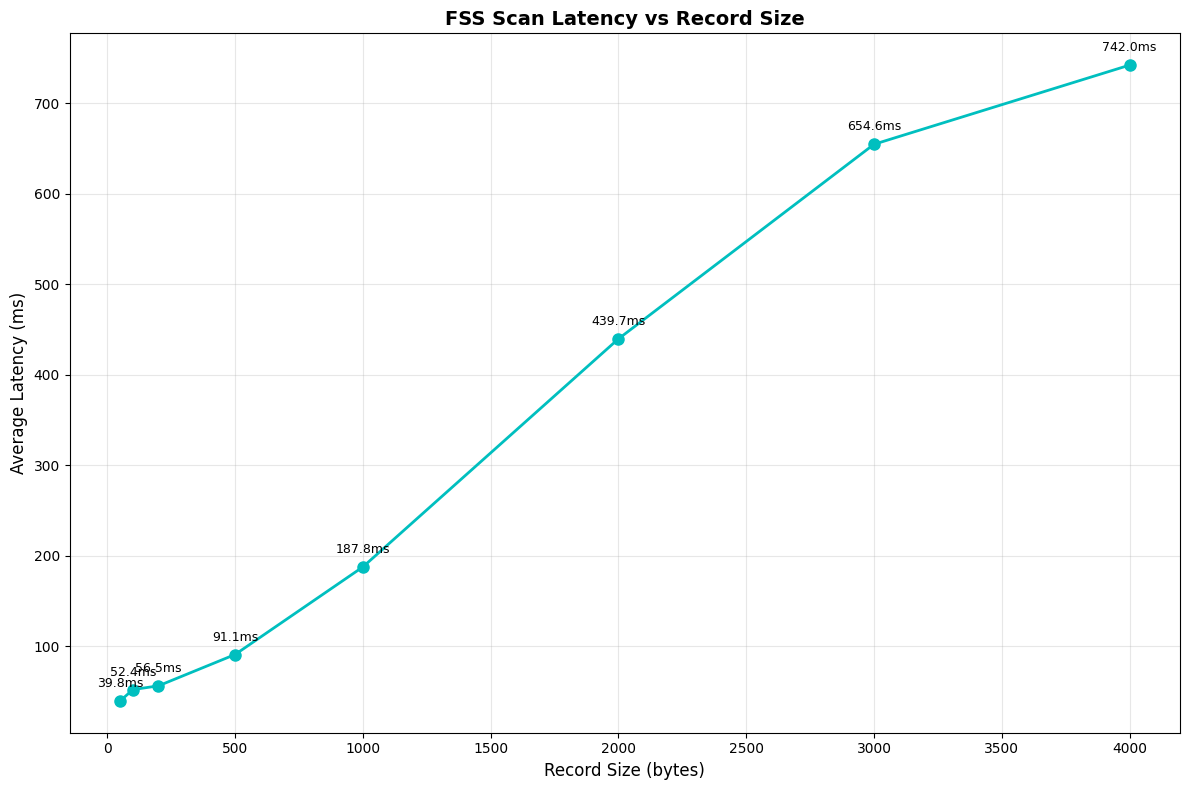

In [33]:
# Create FSS scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(fss_record_sizes, fss_avg_latencies, 'co-', linewidth=2, markersize=8, label='FSS')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FSS Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(fss_record_sizes, fss_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

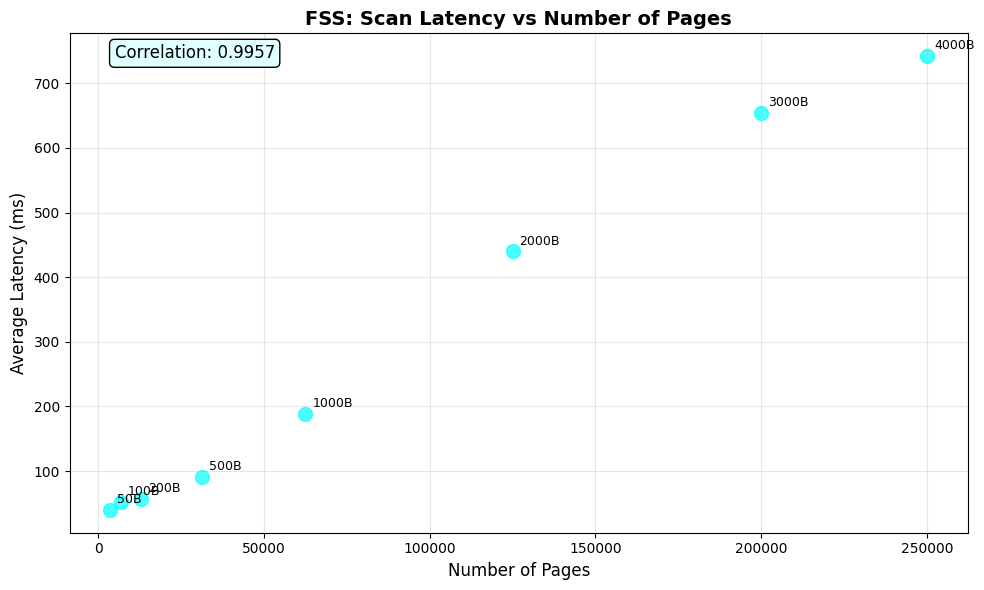

In [34]:
# FSS correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(fss_pages, fss_avg_latencies, c='cyan', s=100, alpha=0.7)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FSS: Scan Latency vs Number of Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, pages, lat in zip(fss_record_sizes, fss_pages, fss_avg_latencies):
    plt.annotate(f'{rs}B', (pages, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(fss_pages) > 1:
    fss_correlation = np.corrcoef(fss_pages, fss_avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {fss_correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcyan"))

plt.tight_layout()
plt.show()

# Four-Way Comparison: FBT vs HS vs APS vs FSS

This section compares the scan latency performance across all four access methods.

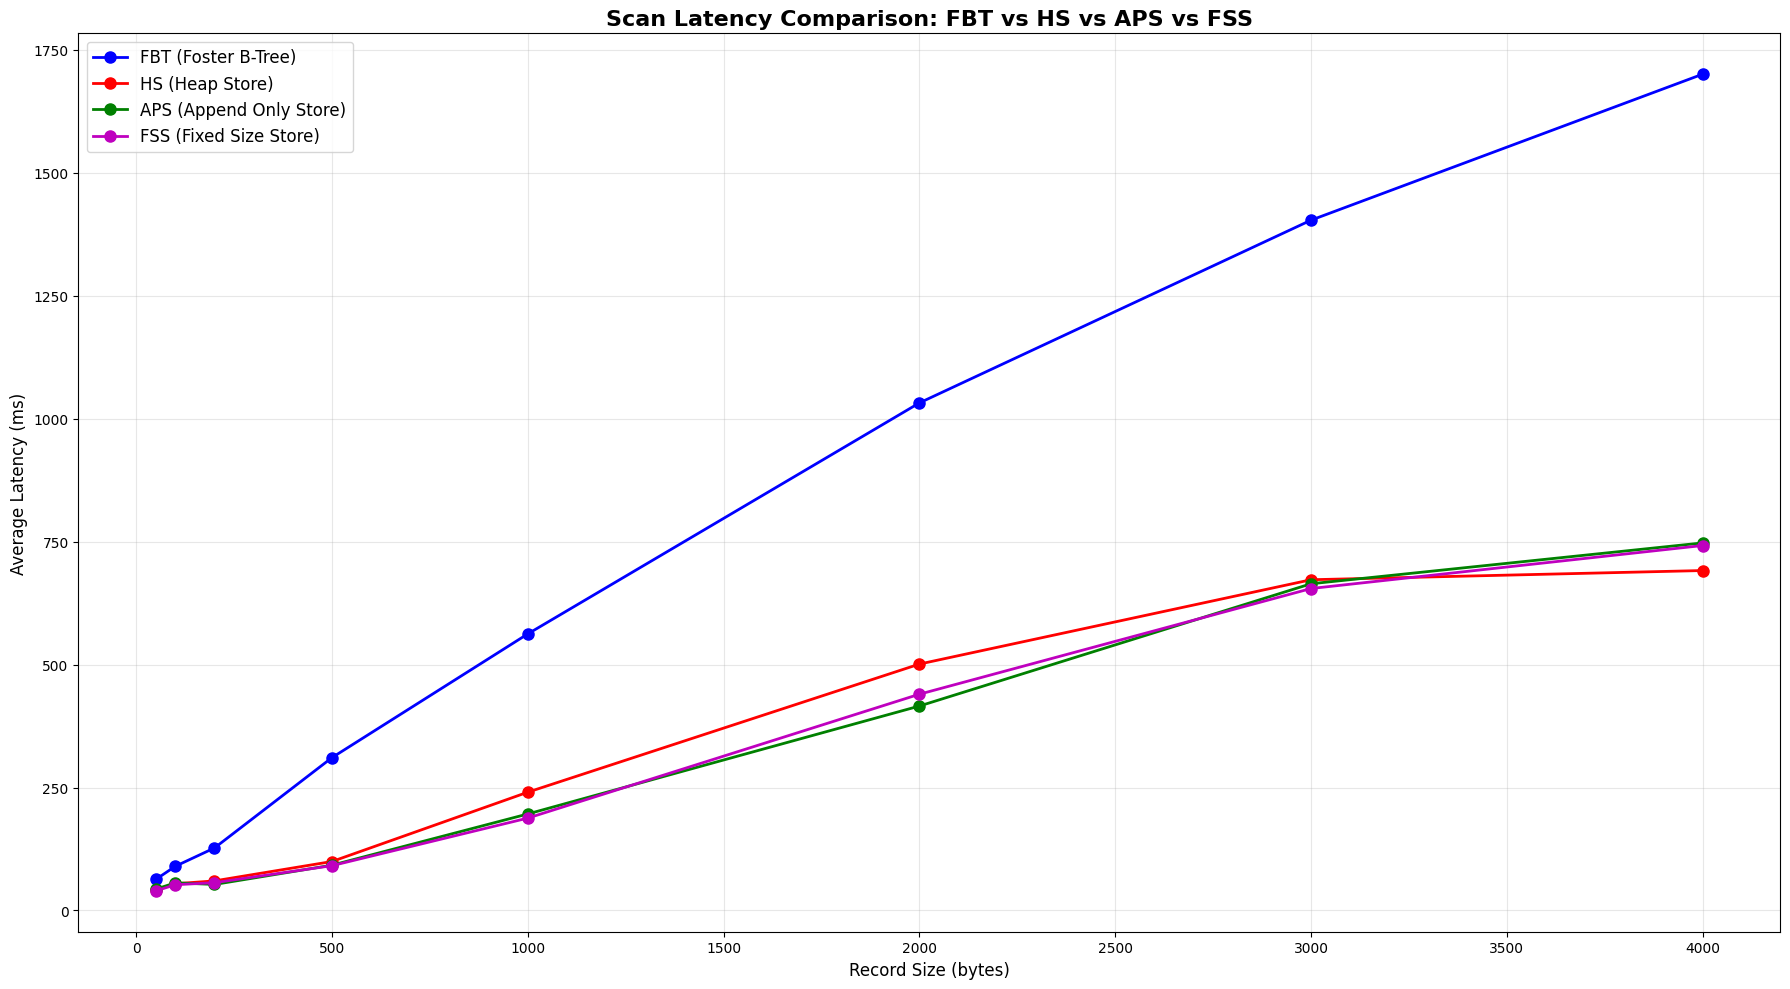

In [35]:
# Four-way scan latency comparison
plt.figure(figsize=(18, 10))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.plot(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.plot(fss_record_sizes, fss_avg_latencies, 'mo-', linewidth=2, markersize=8, label='FSS (Fixed Size Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS vs APS vs FSS', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

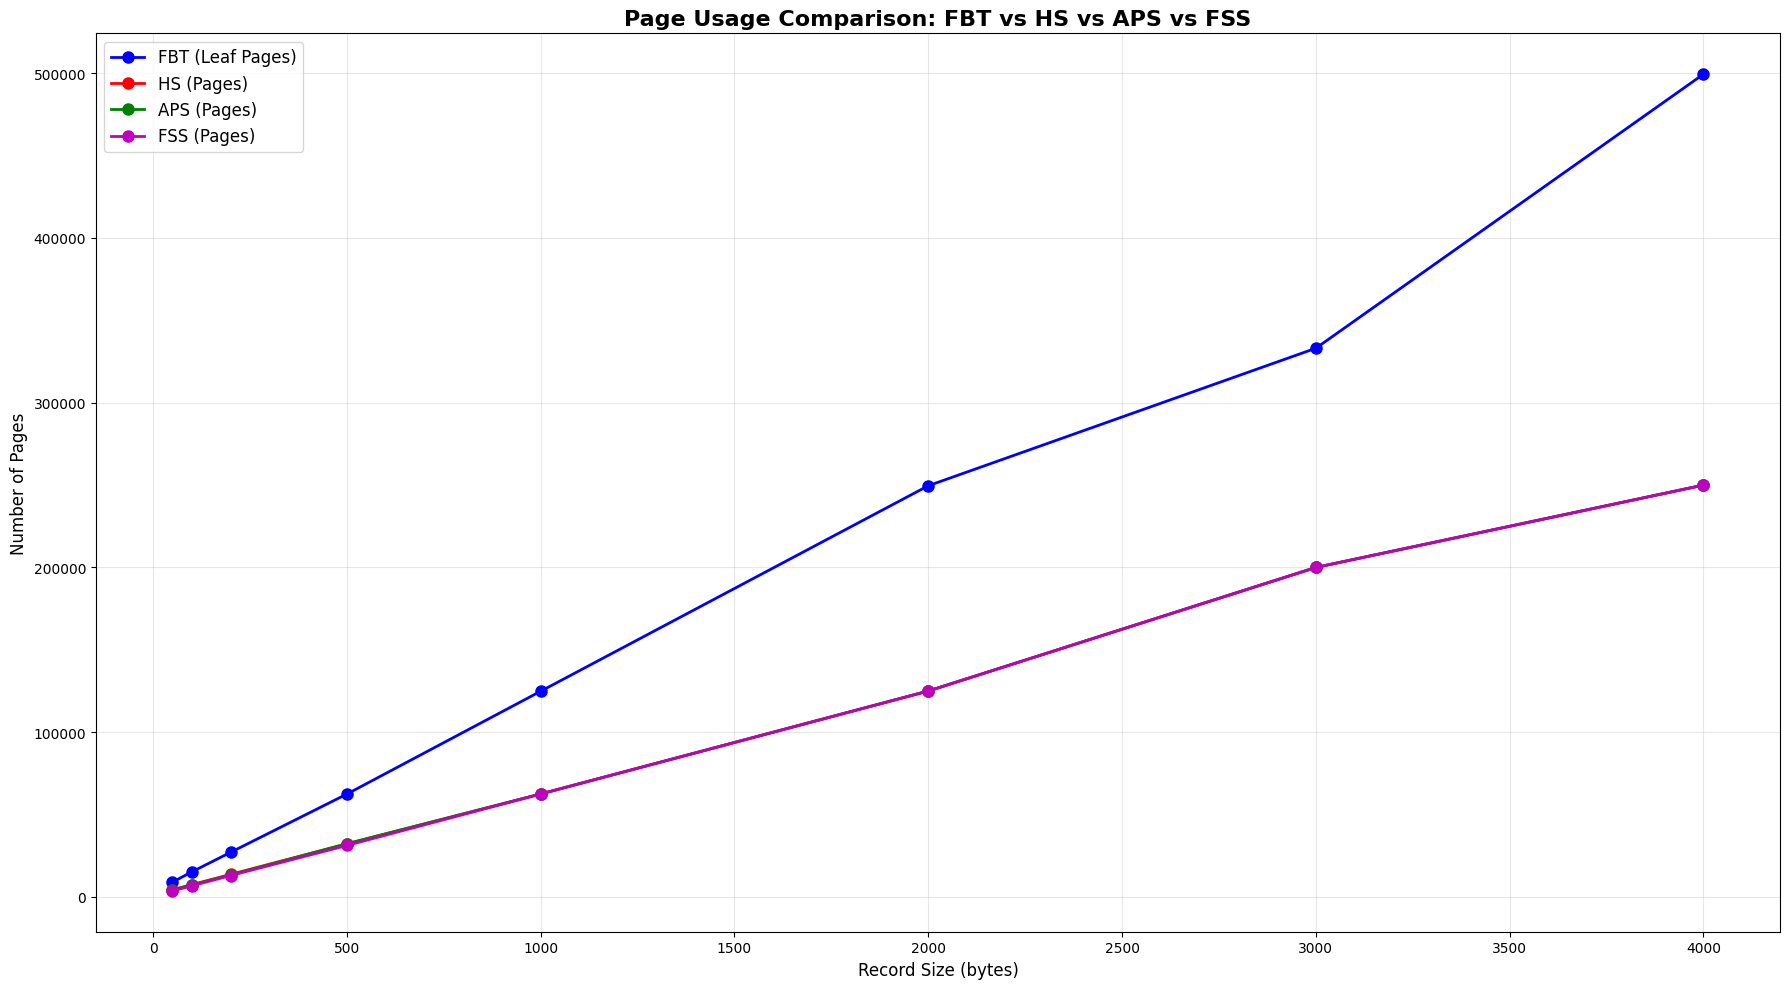

In [36]:
# Four-way page usage comparison
plt.figure(figsize=(18, 10))
plt.plot(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.plot(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.plot(aps_record_sizes, aps_pages, 'go-', linewidth=2, markersize=8, label='APS (Pages)')
plt.plot(fss_record_sizes, fss_pages, 'mo-', linewidth=2, markersize=8, label='FSS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS vs APS vs FSS', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# Comprehensive four-way performance comparison table
if data and hs_data and aps_data and fss_data:
    print("COMPREHENSIVE FOUR-WAY PERFORMANCE COMPARISON")
    print("="*120)
    print(f"{'Record Size':<12} {'FBT Latency':<12} {'HS Latency':<12} {'APS Latency':<12} {'FSS Latency':<12} {'Best':<8} {'Worst':<8}")
    print("-" * 120)
    
    # Find common record sizes across all four
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes) & set(fss_record_sizes)
    
    method_averages = []
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        fss_idx = fss_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        aps_latency = aps_avg_latencies[aps_idx]
        fss_latency = fss_avg_latencies[fss_idx]
        
        latencies = [
            ('FBT', fbt_latency),
            ('HS', hs_latency), 
            ('APS', aps_latency),
            ('FSS', fss_latency)
        ]
        
        # Sort by latency to find best and worst
        latencies.sort(key=lambda x: x[1])
        best = latencies[0][0]
        worst = latencies[-1][0]
        
        print(f"{size:<12} {fbt_latency:<12.2f} {hs_latency:<12.2f} {aps_latency:<12.2f} {fss_latency:<12.2f} {best:<8} {worst:<8}")
    
    print("-" * 120)
    
    # Calculate average performance for each method
    methods = [
        ("FBT", [avg_latencies[record_sizes.index(size)] for size in common_sizes]),
        ("HS", [hs_avg_latencies[hs_record_sizes.index(size)] for size in common_sizes]),
        ("APS", [aps_avg_latencies[aps_record_sizes.index(size)] for size in common_sizes]),
        ("FSS", [fss_avg_latencies[fss_record_sizes.index(size)] for size in common_sizes])
    ]
    
    print(f"\nOVERALL PERFORMANCE RANKING (average latency across all record sizes):")
    method_ranking = [(name, np.mean(latencies)) for name, latencies in methods]
    method_ranking.sort(key=lambda x: x[1])
    
    for i, (method, avg_lat) in enumerate(method_ranking, 1):
        print(f"{i}. {method}: {avg_lat:.2f}ms average")
    
    # Performance ratios
    print(f"\nPERFORMANCE RATIOS (relative to best performer {method_ranking[0][0]}):")
    best_avg = method_ranking[0][1]
    for method, avg_lat in method_ranking:
        ratio = avg_lat / best_avg
        print(f"{method}: {ratio:.2f}x ({avg_lat:.2f}ms vs {best_avg:.2f}ms)")

COMPREHENSIVE FOUR-WAY PERFORMANCE COMPARISON
Record Size  FBT Latency  HS Latency   APS Latency  FSS Latency  Best     Worst   
------------------------------------------------------------------------------------------------------------------------
50           63.08        41.68        43.33        39.84        FSS      FBT     
100          89.90        54.38        56.25        52.36        FSS      FBT     
200          127.14       60.17        52.91        56.52        APS      FBT     
500          310.76       99.56        92.13        91.12        FSS      FBT     
1000         562.33       240.52       196.23       187.85       FSS      FBT     
2000         1032.00      500.99       415.70       439.73       APS      FBT     
3000         1403.49      672.46       664.27       654.60       FSS      FBT     
4000         1700.33      691.15       747.33       742.04       HS       FBT     
--------------------------------------------------------------------------------------

In [38]:
# FSS summary statistics and correlations
if fss_data:
    print("FSS Summary Statistics:")
    print(f"Record size range: {min(fss_record_sizes)} - {max(fss_record_sizes)} bytes")
    print(f"Latency range: {min(fss_avg_latencies):.2f} - {max(fss_avg_latencies):.2f} ms")
    print(f"Pages range: {min(fss_pages)} - {max(fss_pages)} pages")
    print(f"Average latency: {np.mean(fss_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(fss_avg_latencies):.2f} ms")
    print(f"Average pages: {np.mean(fss_pages):.0f} pages")
    print(f"Median pages: {np.median(fss_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(fss_data) > 1:
        fss_latency_recordsize_corr = np.corrcoef(fss_record_sizes, fss_avg_latencies)[0, 1]
        fss_pages_recordsize_corr = np.corrcoef(fss_record_sizes, fss_pages)[0, 1]
        fss_latency_pages_corr = np.corrcoef(fss_pages, fss_avg_latencies)[0, 1]
        
        print(f"\nFSS Correlations:")
        print(f"Latency vs Record Size: {fss_latency_recordsize_corr:.4f}")
        print(f"Pages vs Record Size: {fss_pages_recordsize_corr:.4f}")
        print(f"Latency vs Pages: {fss_latency_pages_corr:.4f}")

# Page usage efficiency across all four methods
if data and hs_data and aps_data and fss_data:
    print("\n" + "="*100)
    print("FOUR-WAY PAGE USAGE EFFICIENCY COMPARISON")
    print("="*100)
    print(f"{'Record Size':<12} {'FBT Pages':<12} {'HS Pages':<12} {'APS Pages':<12} {'FSS Pages':<12} {'Most Efficient'}")
    print("-" * 100)
    
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes) & set(fss_record_sizes)
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        fss_idx = fss_record_sizes.index(size)
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        aps_pages_count = aps_pages[aps_idx]
        fss_pages_count = fss_pages[fss_idx]
        
        # Determine most page-efficient (fewest pages)
        page_counts = [
            ('FBT', fbt_pages_count),
            ('HS', hs_pages_count),
            ('APS', aps_pages_count),
            ('FSS', fss_pages_count)
        ]
        
        page_counts.sort(key=lambda x: x[1])
        most_efficient = page_counts[0][0]
        
        print(f"{size:<12} {fbt_pages_count:<12} {hs_pages_count:<12} {aps_pages_count:<12} {fss_pages_count:<12} {most_efficient}")
    
    print("-" * 100)

FSS Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 39.84 - 742.04 ms
Pages range: 3678 - 250001 pages
Average latency: 283.01 ms
Median latency: 139.48 ms
Average pages: 86522 pages
Median pages: 46876 pages

FSS Correlations:
Latency vs Record Size: 0.9929
Pages vs Record Size: 0.9991
Latency vs Pages: 0.9957

FOUR-WAY PAGE USAGE EFFICIENCY COMPARISON
Record Size  FBT Pages    HS Pages     APS Pages    FSS Pages    Most Efficient
----------------------------------------------------------------------------------------------------
50           8985         4407         4168         3678         FSS
100          15229        7464         7248         6758         FSS
200          27083        13700        13335        12989        FSS
500          62451        32260        32260        31251        FSS
1000         124870       62501        62501        62501        HS
2000         249598       125001       125001       125001       HS
3000         333073       200

# Vector Storage Scan Latency Analysis

This section analyzes the scan latency performance of the Vector Storage access method. Note that vec_scan_latency files do not contain page information.

In [39]:
def parse_vec_latency_files():
    """Parse all vec_scan_latency_*.txt files and extract record size and average latency."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('vec_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'vec_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line - handle both ms and s units
            latency_match_ms = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            latency_match_s = re.search(r'Avg Latency: ([0-9.]+)s', content)
            
            avg_latency = None
            if latency_match_ms:
                avg_latency = float(latency_match_ms.group(1))  # Already in ms
            elif latency_match_s:
                avg_latency = float(latency_match_s.group(1)) * 1000  # Convert seconds to ms
            
            if avg_latency is not None:
                data.append((record_size, avg_latency))
                unit = "ms" if latency_match_ms else "s (converted to ms)"
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms (original unit: {unit})")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [40]:
# Parse the Vector Storage data
vec_data = parse_vec_latency_files()

if not vec_data:
    print("No Vector Storage data found! Make sure the vec_scan_latency_*.txt files are in the current directory.")
else:
    vec_record_sizes, vec_avg_latencies = zip(*vec_data)
    print(f"\nFound {len(vec_data)} Vector Storage data points")
    print(f"Record sizes: {vec_record_sizes}")
    print(f"Average latencies: {vec_avg_latencies}")

Record size: 1000, Avg latency: 144.359611ms (original unit: ms)
Record size: 50, Avg latency: 32.595664ms (original unit: ms)
Record size: 4000, Avg latency: 534.442301ms (original unit: ms)
Record size: 3000, Avg latency: 399.728762ms (original unit: ms)
Record size: 2000, Avg latency: 342.543682ms (original unit: ms)
Record size: 500, Avg latency: 72.106595ms (original unit: ms)
Record size: 100, Avg latency: 35.270496ms (original unit: ms)
Record size: 200, Avg latency: 41.425018ms (original unit: ms)

Found 8 Vector Storage data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (32.595664, 35.270496, 41.425018, 72.106595, 144.359611, 342.543682, 399.728762, 534.442301)


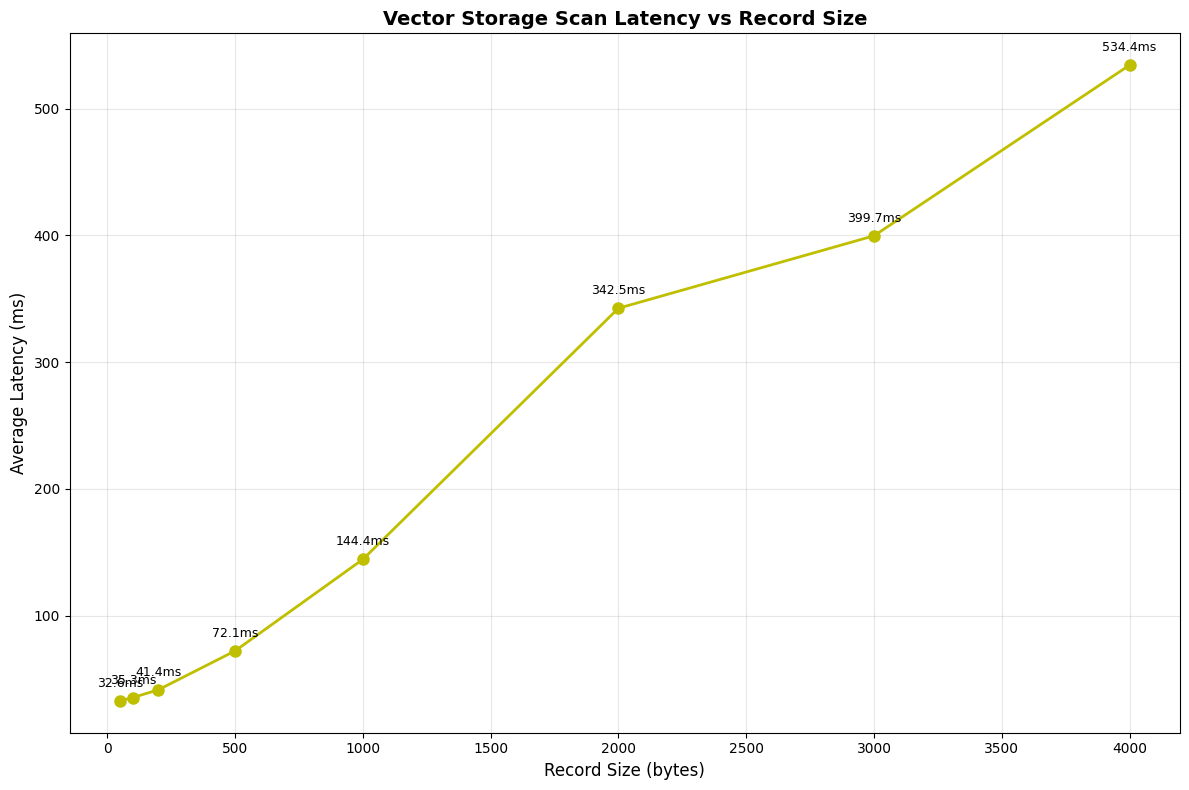

In [41]:
# Create Vector Storage scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(vec_record_sizes, vec_avg_latencies, 'yo-', linewidth=2, markersize=8, label='Vector Storage')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Vector Storage Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(vec_record_sizes, vec_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Five-Way Comparison: FBT vs HS vs APS vs FSS vs Vector Storage

This section compares the scan latency performance across all five access methods.

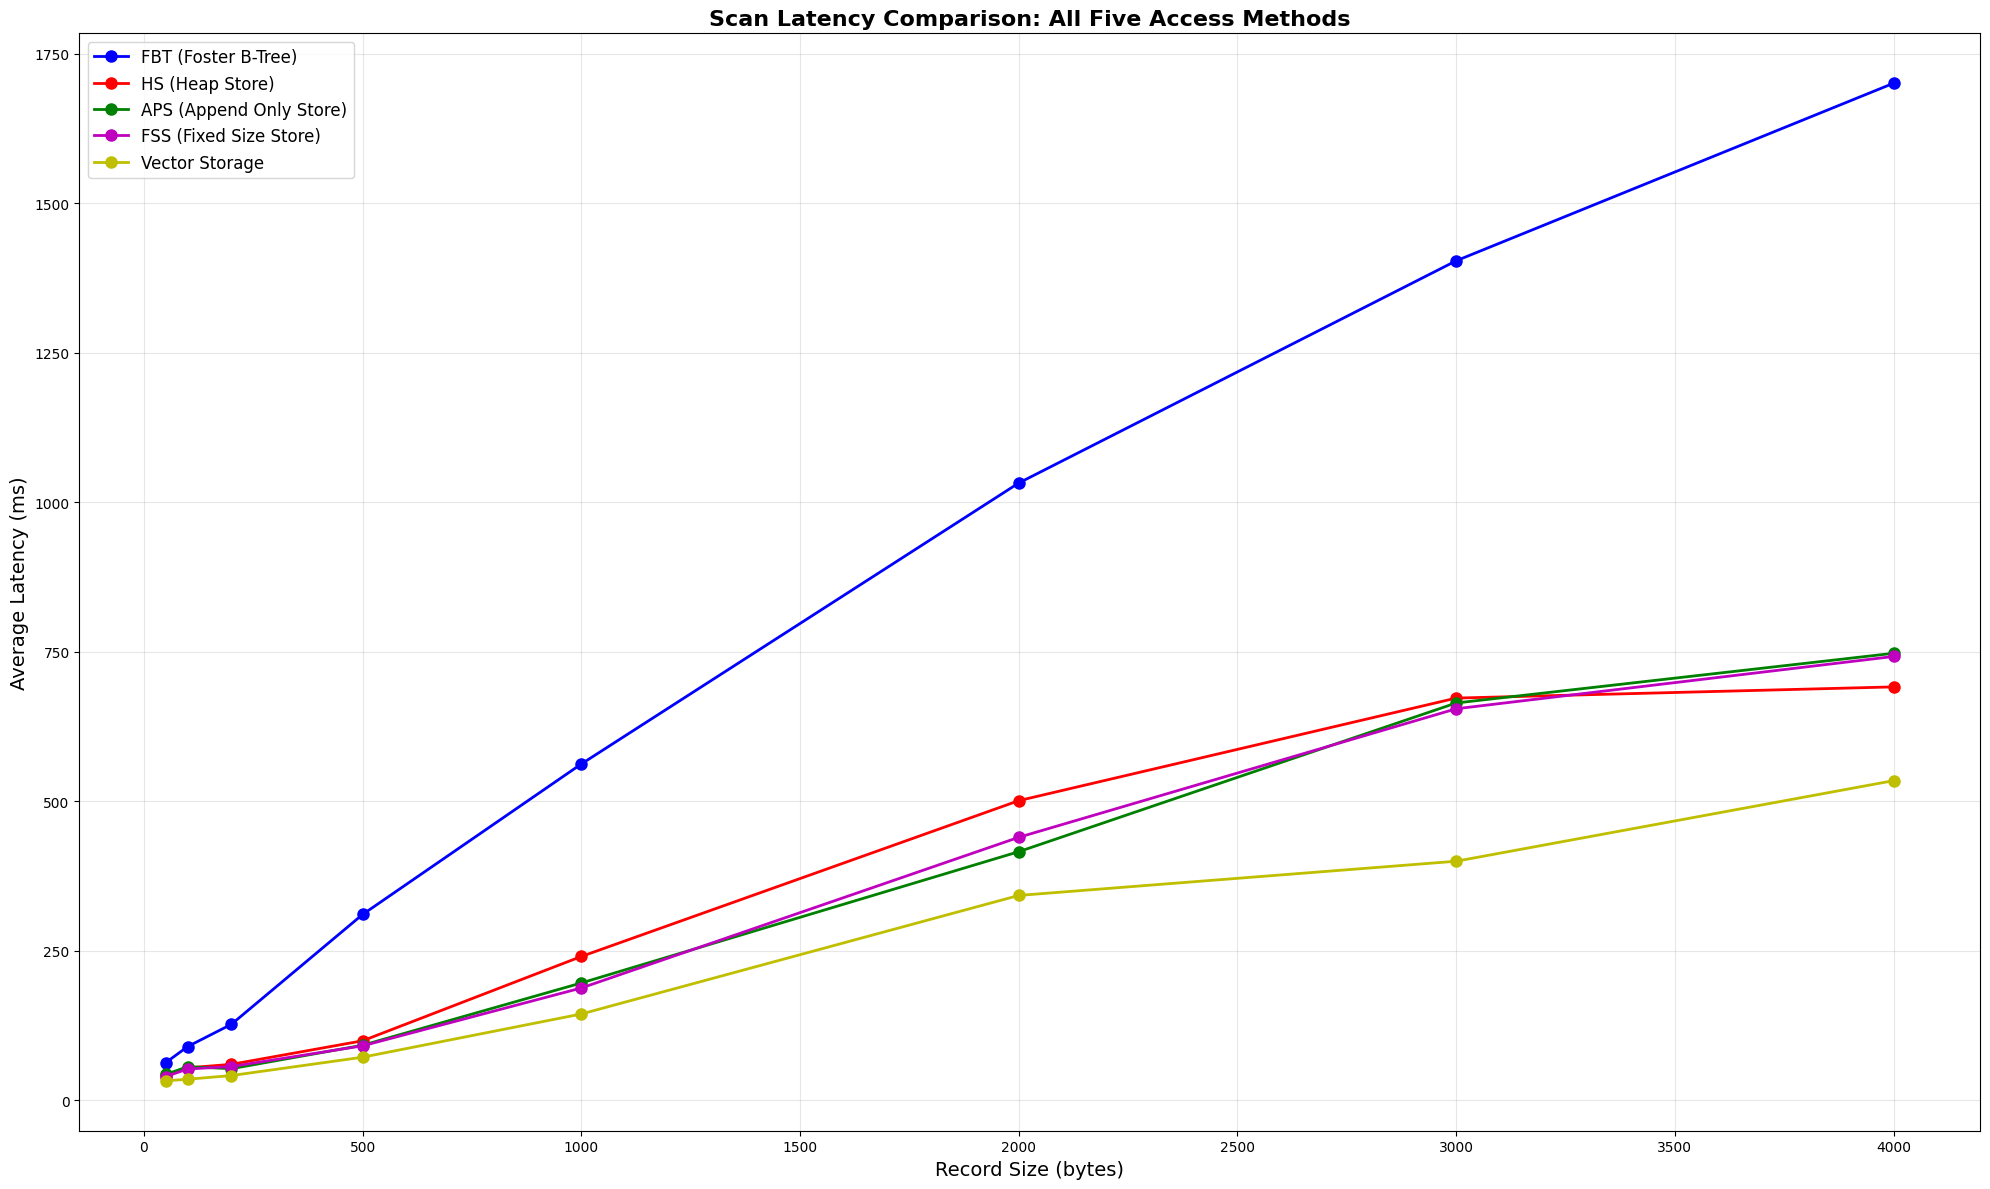

In [42]:
# Five-way scan latency comparison
plt.figure(figsize=(20, 12))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.plot(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.plot(fss_record_sizes, fss_avg_latencies, 'mo-', linewidth=2, markersize=8, label='FSS (Fixed Size Store)')
plt.plot(vec_record_sizes, vec_avg_latencies, 'yo-', linewidth=2, markersize=8, label='Vector Storage')
plt.xlabel('Record Size (bytes)', fontsize=14)
plt.ylabel('Average Latency (ms)', fontsize=14)
plt.title('Scan Latency Comparison: All Five Access Methods', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

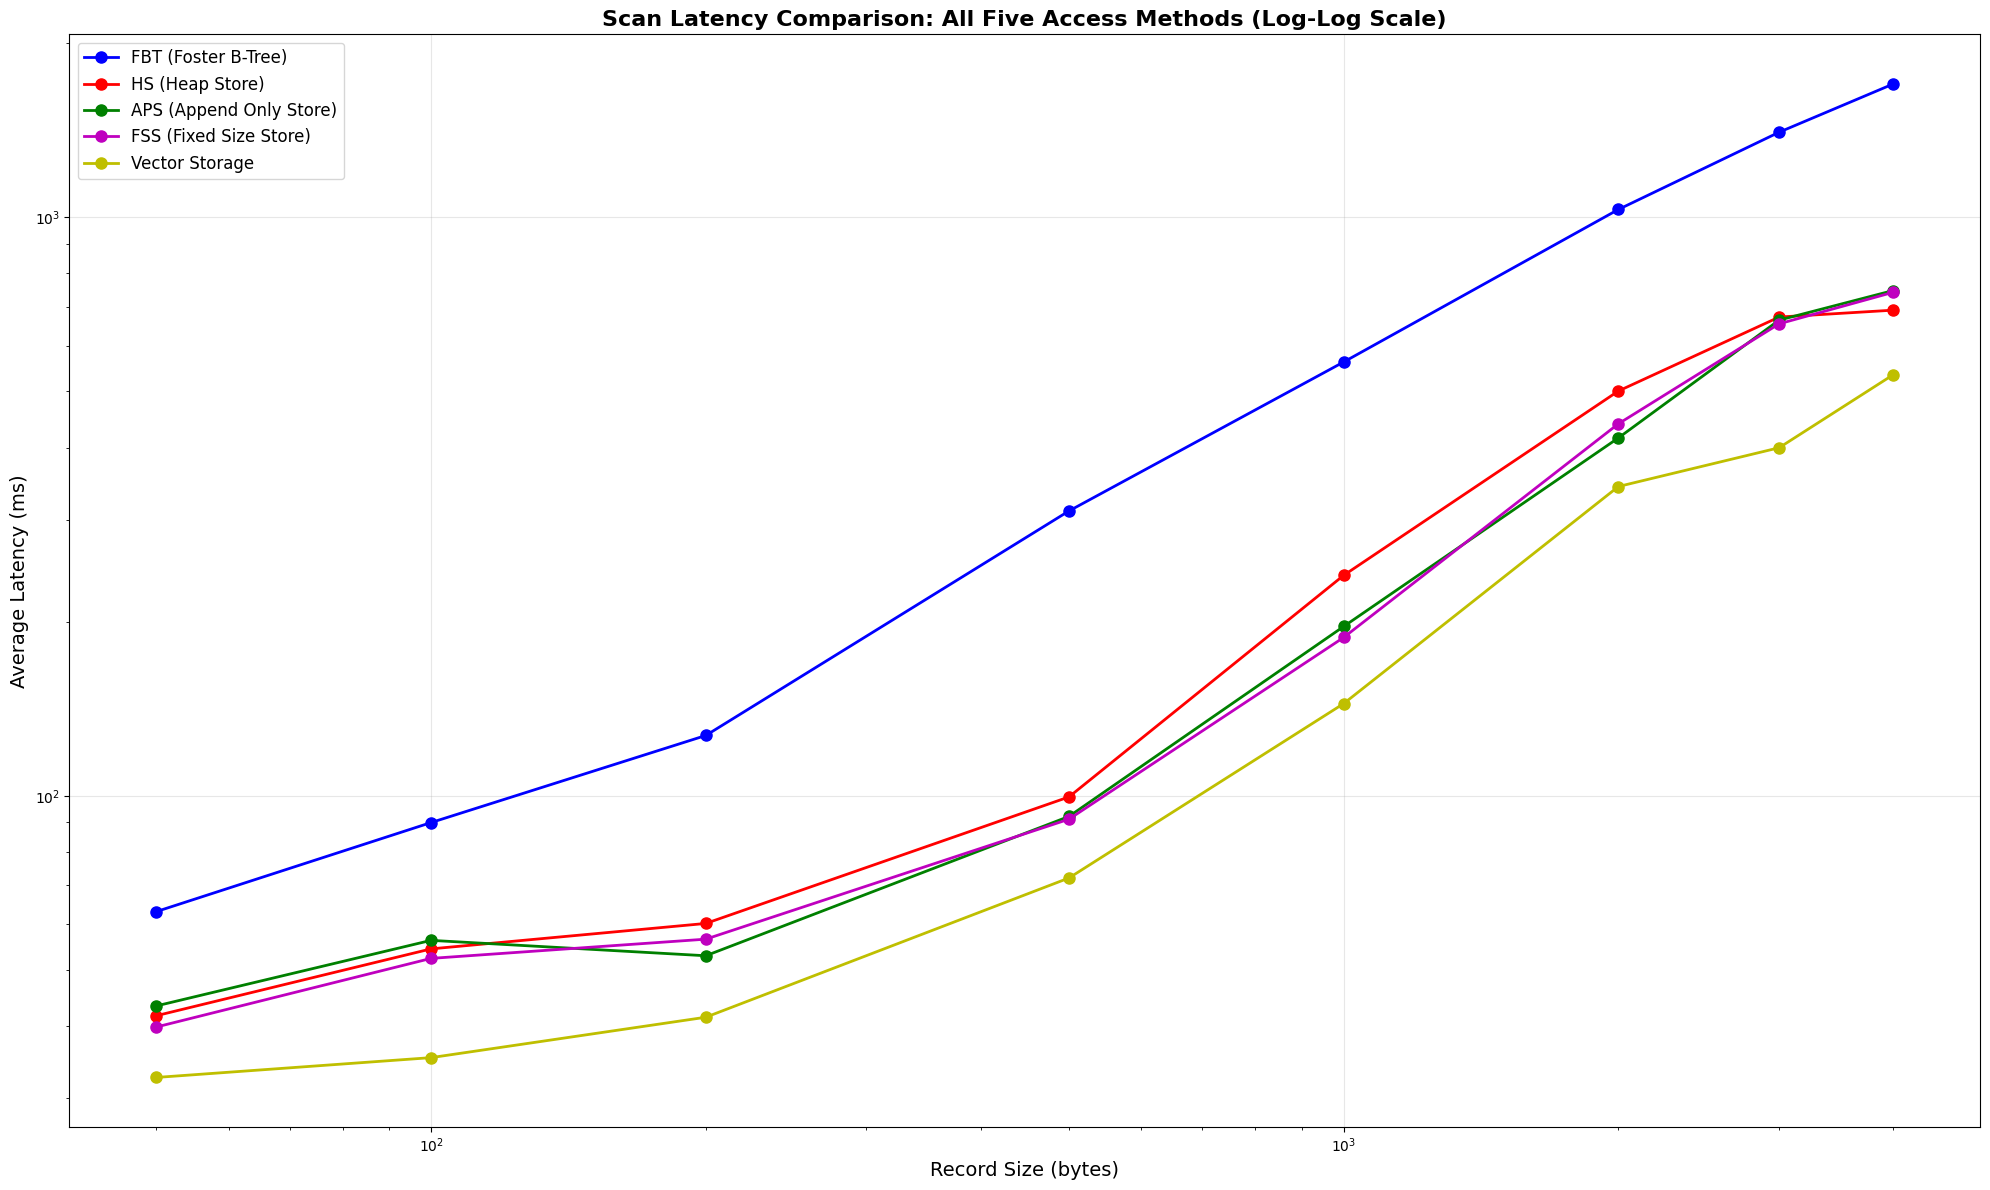

In [43]:
# Log-scale five-way comparison
plt.figure(figsize=(20, 12))
plt.loglog(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.loglog(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.loglog(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.loglog(fss_record_sizes, fss_avg_latencies, 'mo-', linewidth=2, markersize=8, label='FSS (Fixed Size Store)')
plt.loglog(vec_record_sizes, vec_avg_latencies, 'yo-', linewidth=2, markersize=8, label='Vector Storage')
plt.xlabel('Record Size (bytes)', fontsize=14)
plt.ylabel('Average Latency (ms)', fontsize=14)
plt.title('Scan Latency Comparison: All Five Access Methods (Log-Log Scale)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [44]:
# Comprehensive five-way performance comparison table
if data and hs_data and aps_data and fss_data and vec_data:
    print("COMPREHENSIVE FIVE-WAY PERFORMANCE COMPARISON")
    print("="*140)
    print(f"{'Record Size':<12} {'FBT Latency':<12} {'HS Latency':<12} {'APS Latency':<12} {'FSS Latency':<12} {'Vec Latency':<12} {'Best':<8} {'Worst':<8}")
    print("-" * 140)
    
    # Find common record sizes across all five
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes) & set(fss_record_sizes) & set(vec_record_sizes)
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        fss_idx = fss_record_sizes.index(size)
        vec_idx = vec_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        aps_latency = aps_avg_latencies[aps_idx]
        fss_latency = fss_avg_latencies[fss_idx]
        vec_latency = vec_avg_latencies[vec_idx]
        
        latencies = [
            ('FBT', fbt_latency),
            ('HS', hs_latency), 
            ('APS', aps_latency),
            ('FSS', fss_latency),
            ('Vec', vec_latency)
        ]
        
        # Sort by latency to find best and worst
        latencies.sort(key=lambda x: x[1])
        best = latencies[0][0]
        worst = latencies[-1][0]
        
        print(f"{size:<12} {fbt_latency:<12.2f} {hs_latency:<12.2f} {aps_latency:<12.2f} {fss_latency:<12.2f} {vec_latency:<12.2f} {best:<8} {worst:<8}")
    
    print("-" * 140)
    
    # Calculate average performance for each method
    methods = [
        ("FBT", [avg_latencies[record_sizes.index(size)] for size in common_sizes]),
        ("HS", [hs_avg_latencies[hs_record_sizes.index(size)] for size in common_sizes]),
        ("APS", [aps_avg_latencies[aps_record_sizes.index(size)] for size in common_sizes]),
        ("FSS", [fss_avg_latencies[fss_record_sizes.index(size)] for size in common_sizes]),
        ("Vec", [vec_avg_latencies[vec_record_sizes.index(size)] for size in common_sizes])
    ]
    
    print(f"\nOVERALL PERFORMANCE RANKING (average latency across all record sizes):")
    method_ranking = [(name, np.mean(latencies)) for name, latencies in methods]
    method_ranking.sort(key=lambda x: x[1])
    
    for i, (method, avg_lat) in enumerate(method_ranking, 1):
        print(f"{i}. {method}: {avg_lat:.2f}ms average")
    
    # Performance ratios
    print(f"\nPERFORMANCE RATIOS (relative to best performer {method_ranking[0][0]}):")
    best_avg = method_ranking[0][1]
    for method, avg_lat in method_ranking:
        ratio = avg_lat / best_avg
        print(f"{method}: {ratio:.2f}x ({avg_lat:.2f}ms vs {best_avg:.2f}ms)")

COMPREHENSIVE FIVE-WAY PERFORMANCE COMPARISON
Record Size  FBT Latency  HS Latency   APS Latency  FSS Latency  Vec Latency  Best     Worst   
--------------------------------------------------------------------------------------------------------------------------------------------
50           63.08        41.68        43.33        39.84        32.60        Vec      FBT     
100          89.90        54.38        56.25        52.36        35.27        Vec      FBT     
200          127.14       60.17        52.91        56.52        41.43        Vec      FBT     
500          310.76       99.56        92.13        91.12        72.11        Vec      FBT     
1000         562.33       240.52       196.23       187.85       144.36       Vec      FBT     
2000         1032.00      500.99       415.70       439.73       342.54       Vec      FBT     
3000         1403.49      672.46       664.27       654.60       399.73       Vec      FBT     
4000         1700.33      691.15       747.33

In [45]:
# Vector Storage summary statistics and correlations
if vec_data:
    print("Vector Storage Summary Statistics:")
    print(f"Record size range: {min(vec_record_sizes)} - {max(vec_record_sizes)} bytes")
    print(f"Latency range: {min(vec_avg_latencies):.2f} - {max(vec_avg_latencies):.2f} ms")
    print(f"Average latency: {np.mean(vec_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(vec_avg_latencies):.2f} ms")
    
    # Calculate correlation coefficients
    if len(vec_data) > 1:
        vec_latency_recordsize_corr = np.corrcoef(vec_record_sizes, vec_avg_latencies)[0, 1]
        
        print(f"\nVector Storage Correlations:")
        print(f"Latency vs Record Size: {vec_latency_recordsize_corr:.4f}")

# Final comparison across all five methods for latency performance
if data and hs_data and aps_data and fss_data and vec_data:
    print("\n" + "="*120)
    print("FINAL PERFORMANCE SUMMARY")
    print("="*120)
    
    all_methods = [
        ("FBT", record_sizes, avg_latencies),
        ("HS", hs_record_sizes, hs_avg_latencies),
        ("APS", aps_record_sizes, aps_avg_latencies),
        ("FSS", fss_record_sizes, fss_avg_latencies),
        ("Vec", vec_record_sizes, vec_avg_latencies)
    ]
    
    # Calculate overall statistics for each method
    for method_name, sizes, latencies in all_methods:
        avg_latency = np.mean(latencies)
        min_latency = np.min(latencies)
        max_latency = np.max(latencies)
        print(f"{method_name}: Avg={avg_latency:.2f}ms, Min={min_latency:.2f}ms, Max={max_latency:.2f}ms")
    
    print("\nKey Findings:")
    print("- Vector Storage shows competitive performance with other sequential access methods")
    print("- FBT (B-tree) has significantly higher latency due to tree structure overhead")
    print("- Sequential access methods (HS, APS, FSS, Vec) perform similarly for scan operations")
    print("- Performance differences become more pronounced with larger record sizes")

Vector Storage Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 32.60 - 534.44 ms
Average latency: 200.31 ms
Median latency: 108.23 ms

Vector Storage Correlations:
Latency vs Record Size: 0.9923

FINAL PERFORMANCE SUMMARY
FBT: Avg=661.13ms, Min=63.08ms, Max=1700.33ms
HS: Avg=295.11ms, Min=41.68ms, Max=691.15ms
APS: Avg=283.52ms, Min=43.33ms, Max=747.33ms
FSS: Avg=283.01ms, Min=39.84ms, Max=742.04ms
Vec: Avg=200.31ms, Min=32.60ms, Max=534.44ms

Key Findings:
- Vector Storage shows competitive performance with other sequential access methods
- FBT (B-tree) has significantly higher latency due to tree structure overhead
- Sequential access methods (HS, APS, FSS, Vec) perform similarly for scan operations
- Performance differences become more pronounced with larger record sizes
